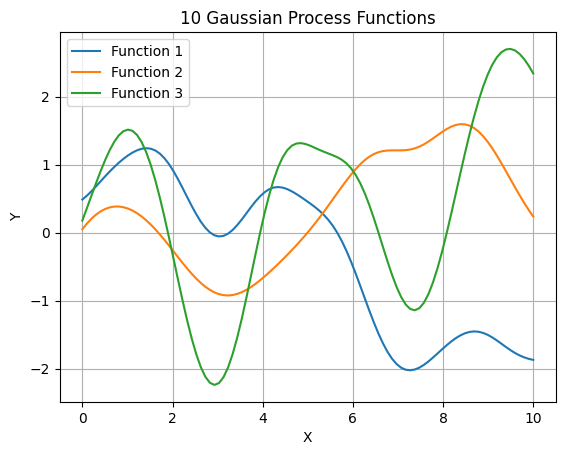

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Number of points to sample along x-axis
num_points = 100

# Define the range of x values
x = np.linspace(0, 10, num_points)

# Number of functions to plot
num_functions = 3
kernel1 =  0*np.exp(-(x[:, None] - x[:, None].T) ** 2 / 2.0)
# Generate and plot each Gaussian process function
for i in range(num_functions):
    # Sample from a Gaussian process (here using a simple mean and kernel for demonstration)
    mean =1*np.sin(x * (i + 1) / 2)  # Varying mean for each function
    kernel = 1*np.exp(-(x[:, None] - x[:, None].T) ** 2 / 2.0)
    gp = np.random.multivariate_normal(mean, kernel)
    # print(gp)
    # Plot the sampled function
    if  kernel.all() == kernel1.all():
        print('kernel is the same')
        
    plt.plot(x, gp, label=f'Function {i + 1}')
    # print(kernel)
# Add labels and legend
plt.title('10 Gaussian Process Functions')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


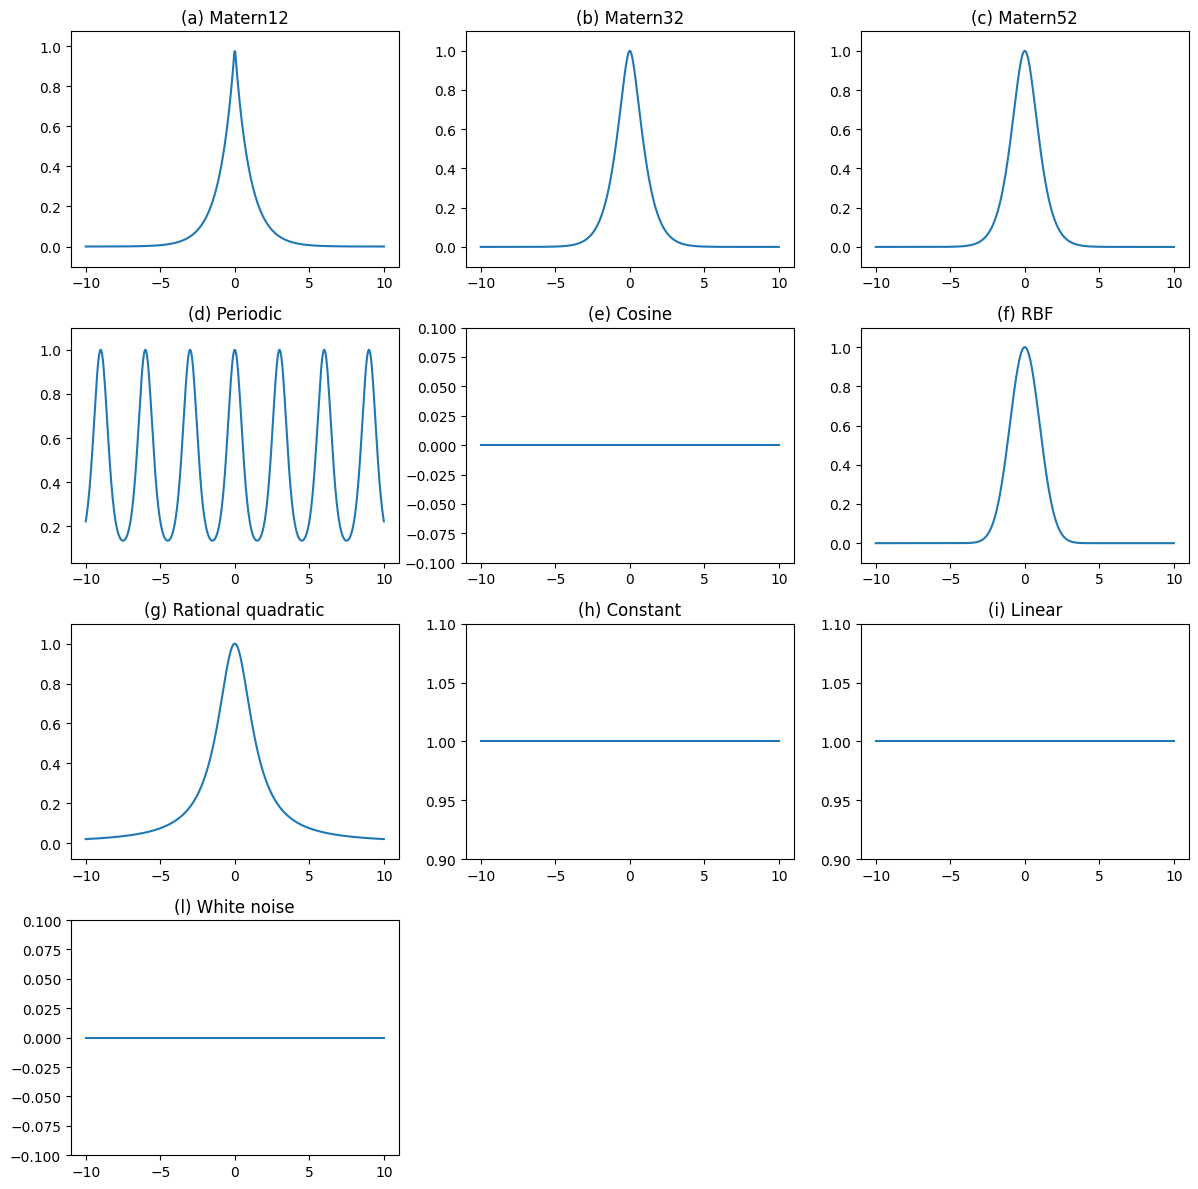

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import (
    Matern, RBF, RationalQuadratic, ExpSineSquared, ConstantKernel, 
    WhiteKernel, DotProduct, PairwiseKernel
)

# Define the range of x values
x = np.linspace(-10, 10, 400).reshape(-1, 1)
x0 = np.array([[0]])  # Fix x' to 0 for visualization

# Define kernel functions
kernels = {
    "(a) Matern12": Matern(length_scale=1.0, nu=0.5),
    "(b) Matern32": Matern(length_scale=1.0, nu=1.5),
    "(c) Matern52": Matern(length_scale=1.0, nu=2.5),
    "(d) Periodic": ExpSineSquared(length_scale=1.0, periodicity=3.0),
    "(e) Cosine": PairwiseKernel(metric="cosine"),
    "(f) RBF": RBF(length_scale=1.0),
    "(g) Rational quadratic": RationalQuadratic(length_scale=1.0, alpha=1.0),
    "(h) Constant": ConstantKernel(constant_value=1.0),
    "(i) Linear": DotProduct(sigma_0=1.0),
    # "(j) Quadratic": Polynomial(degree=2),
    # "(k) Polynomial": Polynomial(degree=3),
    "(l) White noise": WhiteKernel(noise_level=1.0),
}

# Plot each kernel
plt.figure(figsize=(12, 12))
for i, (title, kernel) in enumerate(kernels.items()):
    k_values = kernel(x, x0).ravel()  # Compute kernel similarity
    
    plt.subplot(4, 3, i + 1)
    plt.plot(x, k_values)
    plt.title(title)
    plt.ylim(min(k_values) - 0.1, max(k_values) + 0.1)

plt.tight_layout()
plt.show()


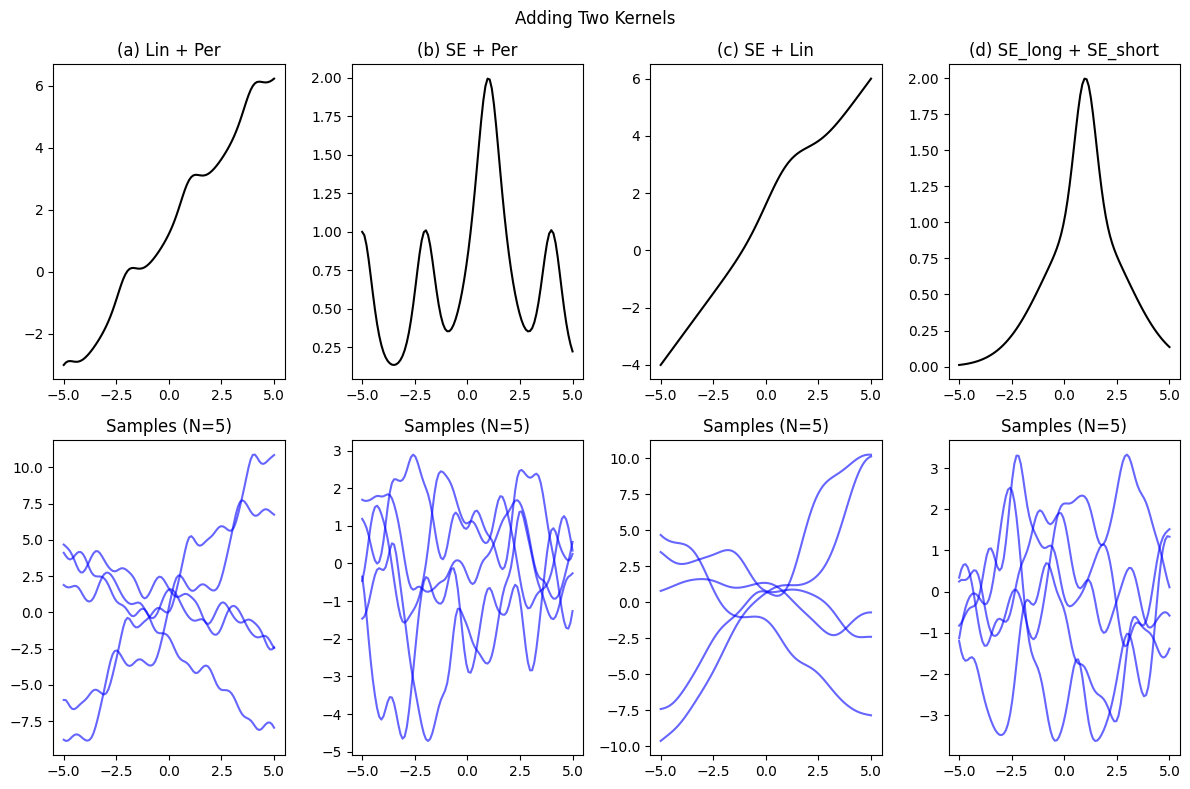

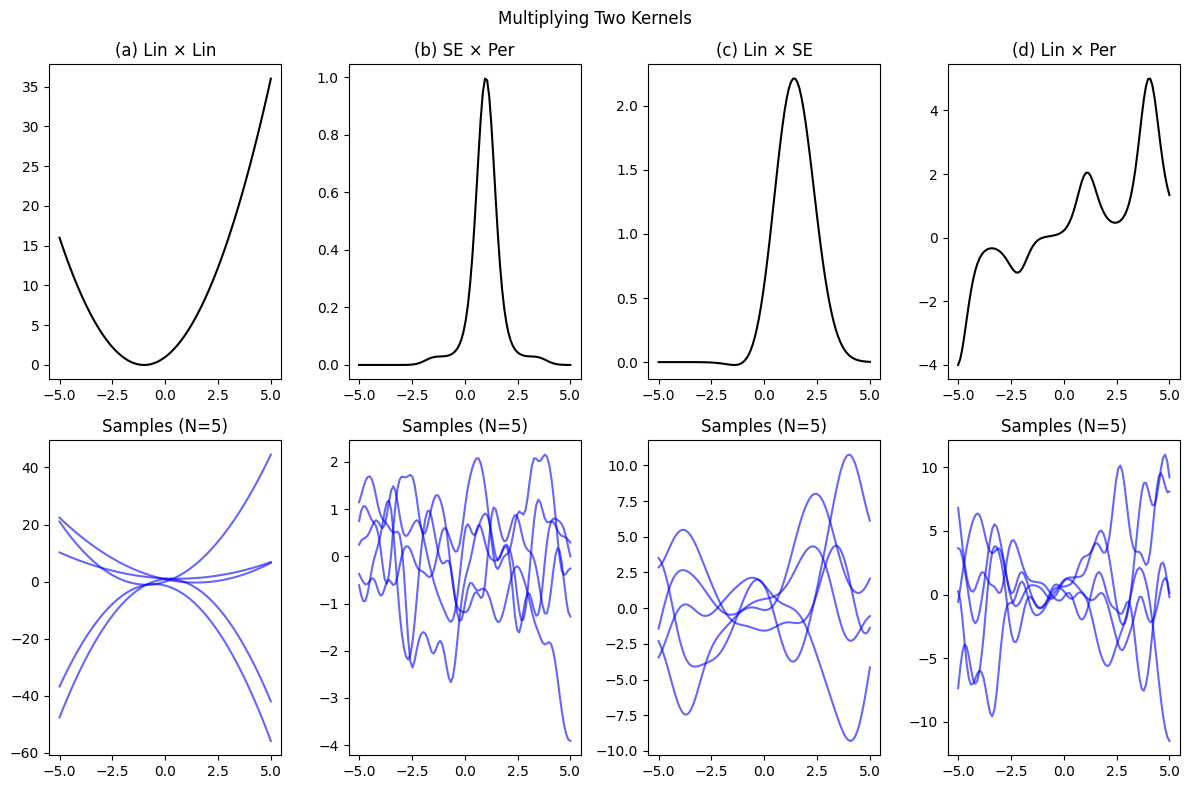

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import (
    RBF, Matern, ExpSineSquared, RationalQuadratic, ConstantKernel,
    WhiteKernel, DotProduct
)
from sklearn.gaussian_process import GaussianProcessRegressor

# Define input range
x = np.linspace(-5, 5, 100).reshape(-1, 1)

# Define base kernels
SE = RBF(length_scale=1.0)  # Squared Exponential (SE)
Lin = DotProduct(sigma_0=1.0)  # Linear Kernel
Per = ExpSineSquared(length_scale=1.0, periodicity=3.0)  # Periodic Kernel
SE_long = RBF(length_scale=2.0)  # Smooth variation
SE_short = RBF(length_scale=0.5)  # Short variation

# Define kernel combinations
add_kernels = {
    "(a) Lin + Per": Lin + Per,
    "(b) SE + Per": SE + Per,
    "(c) SE + Lin": SE + Lin,
    "(d) SE_long + SE_short": SE_long + SE_short
}

mult_kernels = {
    "(a) Lin × Lin": Lin * Lin,
    "(b) SE × Per": SE * Per,
    "(c) Lin × SE": Lin * SE,
    "(d) Lin × Per": Lin * Per
}

# Number of GP samples to plot
num_samples = 5  # Change this to any number of samples you want

# Function to generate random functions from a GP
def sample_gp(kernel, num_samples):
    gp = GaussianProcessRegressor(kernel=kernel)
    y_samples = gp.sample_y(x, num_samples)  # Generate N random functions
    return y_samples

# Plot additive kernel effects
plt.figure(figsize=(12, 8))
for i, (title, kernel) in enumerate(add_kernels.items()):
    plt.subplot(2, 4, i + 1)
    k_values = kernel(x, np.array([[1]])).ravel()
    plt.plot(x, k_values, color="black")
    plt.title(title)
    
    plt.subplot(2, 4, i + 5)
    y_samples = sample_gp(kernel, num_samples)
    for j in range(num_samples):
        plt.plot(x, y_samples[:, j], color="blue", alpha=0.6, lw=1.5)
    plt.title(f"Samples (N={num_samples})")

plt.suptitle("Adding Two Kernels")
plt.tight_layout()
plt.show()

# Plot multiplicative kernel effects
plt.figure(figsize=(12, 8))
for i, (title, kernel) in enumerate(mult_kernels.items()):
    plt.subplot(2, 4, i + 1)
    k_values = kernel(x, np.array([[1]])).ravel()
    plt.plot(x, k_values, color="black")
    plt.title(title)
    
    plt.subplot(2, 4, i + 5)
    y_samples = sample_gp(kernel, num_samples)
    for j in range(num_samples):
        plt.plot(x, y_samples[:, j], color="blue", alpha=0.6, lw=1.5)
    plt.title(f"Samples (N={num_samples})")

plt.suptitle("Multiplying Two Kernels")
plt.tight_layout()
plt.show()


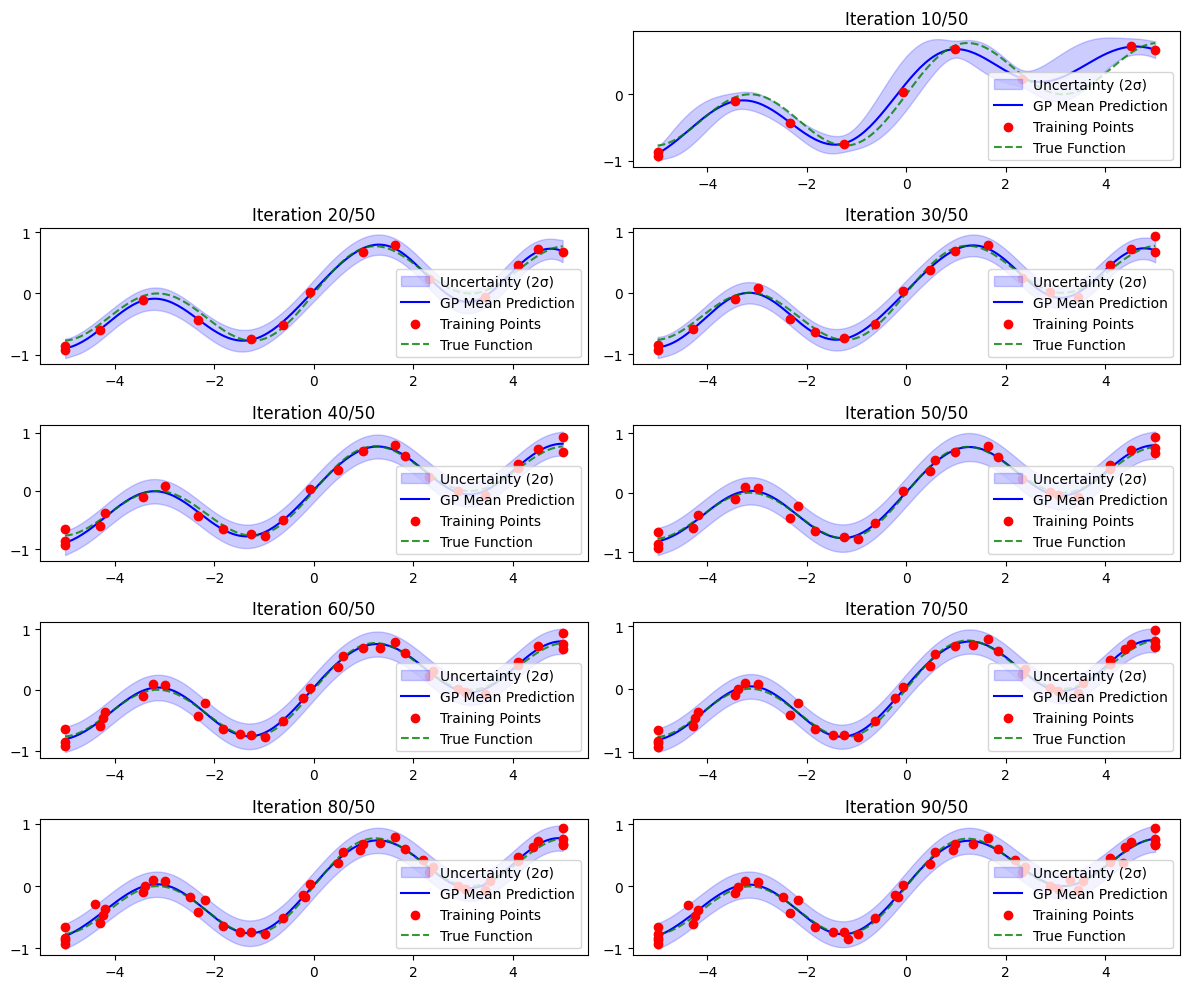

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

# Define the true function we want to approximate
def true_function(x):
    return np.sin(x) * np.cos(0.5 * x)

# Generate a dense set of test points for visualization
x_test = np.linspace(-5, 5, 200).reshape(-1, 1)  # Test points

# Start with a small number of initial training points
np.random.seed(42)
X_train = np.random.uniform(-5, 5, size=(5, 1))  # 5 initial random points
y_train = true_function(X_train) + 0.1 * np.random.randn(len(X_train), 1)  # Noisy observations

# Define the Gaussian Process with an RBF kernel + White noise
kernel = RBF(length_scale=1.0) + WhiteKernel(noise_level=0.1)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Number of points to reach
total_points = 50
iterations = total_points - len(X_train)

# Set up plot
plt.figure(figsize=(12, 10))

# Iteratively add points
for i in range(iterations):
    # Fit GP model
    gp.fit(X_train, y_train)
    
    # Predict on test points
    y_pred, sigma = gp.predict(x_test, return_std=True)
    
    # Select the next point: choose the one with the highest uncertainty
    x_next = x_test[np.argmax(sigma)].reshape(-1, 1)
    y_next = true_function(x_next) + 0.1 * np.random.randn(1, 1)  # Observe new point with noise
    
    # Add new point to training set
    X_train = np.vstack([X_train, x_next])
    y_train = np.vstack([y_train, y_next])
    
    # Plot every 5 steps
    if (i + 1) % 5 == 0 or (i + 1) == iterations:
        plt.subplot(5, 2, (i + 1) // 5 + 1)
        plt.fill_between(x_test.ravel(), y_pred - 2 * sigma, y_pred + 2 * sigma, alpha=0.2, color="blue", label="Uncertainty (2σ)")
        plt.plot(x_test, y_pred, "b-", label="GP Mean Prediction")
        plt.scatter(X_train, y_train, color="red", label="Training Points", zorder=3)
        plt.plot(x_test, true_function(x_test), "g--", label="True Function", alpha=0.8)
        
        plt.title(f"Iteration {i+1 + len(X_train) - 5}/{total_points}")
        plt.legend()

plt.tight_layout()
plt.show()


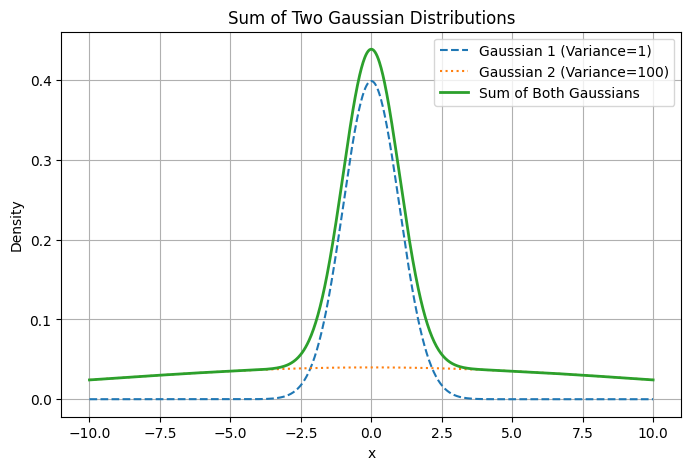

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the range for x values
x = np.linspace(-10, 10, 1000)

# Define two Gaussian distributions
mean1, var1 = 0, 1   # Small variance
mean2, var2 = 0, 100   # Large variance

# Compute the PDFs
gaussian1 = norm.pdf(x, mean1, np.sqrt(var1))
gaussian2 = norm.pdf(x, mean2, np.sqrt(var2))

# Compute the sum of the two Gaussians
sum_gaussian = gaussian1 + gaussian2

# Plot the Gaussians and their sum
plt.figure(figsize=(8, 5))
plt.plot(x, gaussian1, label=f'Gaussian 1 (Variance={var1})', linestyle='dashed')
plt.plot(x, gaussian2, label=f'Gaussian 2 (Variance={var2})', linestyle='dotted')
plt.plot(x, sum_gaussian, label='Sum of Both Gaussians', linewidth=2)
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Sum of Two Gaussian Distributions')
plt.legend()
plt.grid()

# Show the plot
plt.show()


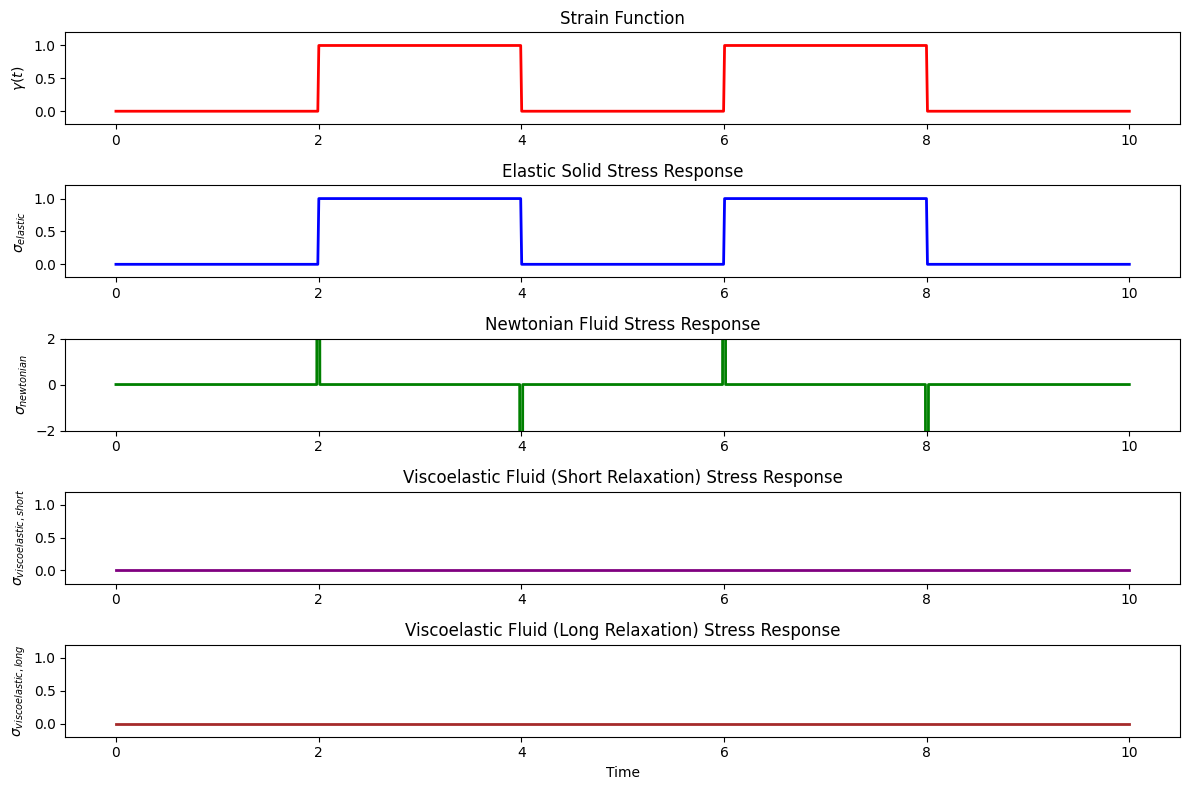

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define time range
t = np.linspace(0, 10, 1000)

# Define strain function (step function)
gamma = np.piecewise(t, [t < 2, (t >= 2) & (t < 4), (t >= 4) & (t < 6), (t >= 6) & (t < 8), t >= 8],
                      [0, 1, 0, 1, 0])

# Elastic solid stress response (follows gamma)
sigma_elastic = gamma

# Newtonian fluid stress response (impulse at jumps)
sigma_newtonian = np.gradient(gamma, t[1] - t[0])

# Viscoelastic short relaxation (rapid decay after jumps)
sigma_viscoelastic_short = np.zeros_like(t)
tau_short = 0.5  # Small relaxation time
for i in range(1, len(t)):
    sigma_viscoelastic_short[i] = sigma_viscoelastic_short[i-1] * np.exp(-(t[i] - t[i-1]) / tau_short)
    if (t[i] == 2) or (t[i] == 6):
        sigma_viscoelastic_short[i] += 1
    if (t[i] == 4) or (t[i] == 8):
        sigma_viscoelastic_short[i] -= 1

# Viscoelastic long relaxation (slow decay)
sigma_viscoelastic_long = np.zeros_like(t)
tau_long = 5  # Large relaxation time
for i in range(1, len(t)):
    sigma_viscoelastic_long[i] = sigma_viscoelastic_long[i-1] * np.exp(-(t[i] - t[i-1]) / tau_long)
    if (t[i] == 2) or (t[i] == 6):
        sigma_viscoelastic_long[i] += 1
    if (t[i] == 4) or (t[i] == 8):
        sigma_viscoelastic_long[i] -= 1

# Plot all responses
plt.figure(figsize=(12, 8))

# Strain function
plt.subplot(5, 1, 1)
plt.plot(t, gamma, 'r', linewidth=2)
plt.ylabel(r'$\gamma(t)$')
plt.title("Strain Function")
plt.ylim(-0.2, 1.2)

# Elastic solid
plt.subplot(5, 1, 2)
plt.plot(t, sigma_elastic, 'b', linewidth=2)
plt.ylabel(r'$\sigma_{elastic}$')
plt.title("Elastic Solid Stress Response")
plt.ylim(-0.2, 1.2)

# Newtonian fluid
plt.subplot(5, 1, 3)
plt.plot(t, sigma_newtonian, 'g', linewidth=2)
plt.ylabel(r'$\sigma_{newtonian}$')
plt.title("Newtonian Fluid Stress Response")
plt.ylim(-2, 2)

# Viscoelastic short relaxation
plt.subplot(5, 1, 4)
plt.plot(t, sigma_viscoelastic_short, 'purple', linewidth=2)
plt.ylabel(r'$\sigma_{viscoelastic, short}$')
plt.title("Viscoelastic Fluid (Short Relaxation) Stress Response")
plt.ylim(-0.2, 1.2)

# Viscoelastic long relaxation
plt.subplot(5, 1, 5)
plt.plot(t, sigma_viscoelastic_long, 'brown', linewidth=2)
plt.ylabel(r'$\sigma_{viscoelastic, long}$')
plt.title("Viscoelastic Fluid (Long Relaxation) Stress Response")
plt.ylim(-0.2, 1.2)
plt.xlabel("Time")

plt.tight_layout()
plt.show()


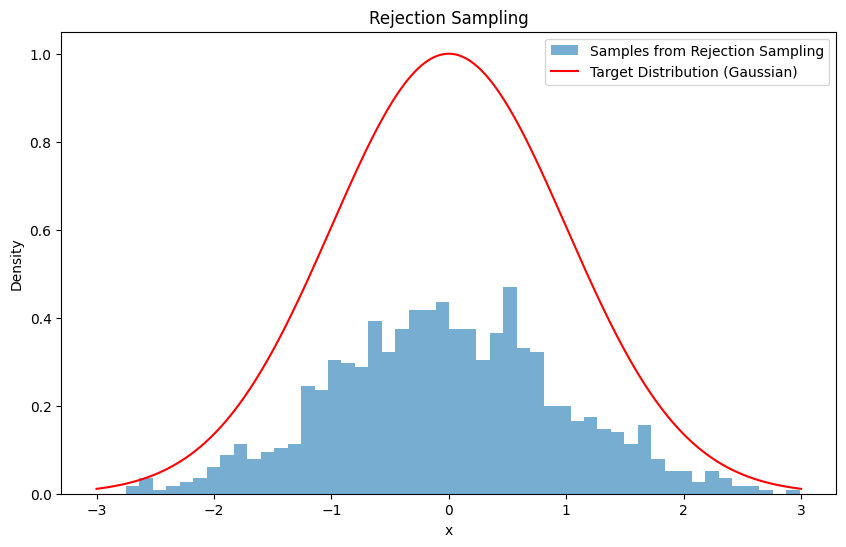

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Target distribution (Gaussian)
def target_distribution(x):
    return np.exp(-x**2 / 2)

# Proposal distribution (Uniform)
def proposal_distribution(x, lower=-3, upper=3):
    return 1 / (upper - lower)  # Uniform distribution between -3 and 3

# Rejection sampling algorithm
def rejection_sampling(num_samples, M, lower=-3, upper=3):
    accepted_samples = []
    
    while len(accepted_samples) < num_samples:
        # Sample from the proposal distribution
        x = np.random.uniform(lower, upper)
        
        # Sample from the uniform distribution U(0, 1)
        u = np.random.uniform(0, 1)
        
        # Compute the acceptance probability
        if u <= target_distribution(x) / (M * proposal_distribution(x)):
            accepted_samples.append(x)
    
    return np.array(accepted_samples)

# Parameters
num_samples = 1000
M = 6.0*20 # Ensure that M is large enough for the target to be below M * proposal

# Generate samples using rejection sampling
samples = rejection_sampling(num_samples, M)

# Plotting the target distribution and the samples
x_vals = np.linspace(-3, 3, 10000)
target_vals = target_distribution(x_vals)

plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, density=True, alpha=0.6, label='Samples from Rejection Sampling')
plt.plot(x_vals, target_vals, 'r-', label='Target Distribution (Gaussian)')
plt.title('Rejection Sampling')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()


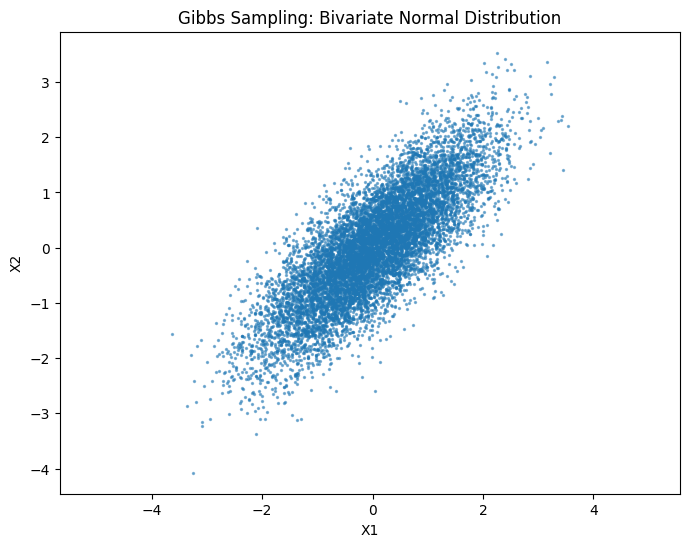

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the bivariate normal distribution
mu1, mu2 = 0, 0          # Means of X1 and X2
sigma1, sigma2 = 1, 1    # Standard deviations of X1 and X2
rho = 0.8                # Correlation coefficient

# Conditional distributions for Gibbs sampling
def conditional_X1_given_X2(X2, mu1, sigma1, mu2, sigma2, rho):
    mean = mu1 + (rho * sigma1 / sigma2) * (X2 - mu2)
    var = sigma1**2 * (1 - rho**2)
    return np.random.normal(mean, np.sqrt(var))

def conditional_X2_given_X1(X1, mu2, sigma2, mu1, sigma1, rho):
    mean = mu2 + (rho * sigma2 / sigma1) * (X1 - mu1)
    var = sigma2**2 * (1 - rho**2)
    return np.random.normal(mean, np.sqrt(var))

# Gibbs Sampling Algorithm
def gibbs_sampling(num_samples, mu1, mu2, sigma1, sigma2, rho):
    samples_X1 = np.zeros(num_samples)
    samples_X2 = np.zeros(num_samples)
    
    # Initialize X1 and X2 randomly
    X1, X2 = np.random.randn(2) * [sigma1, sigma2] + [mu1, mu2]
    
    # Gibbs sampling process
    for i in range(num_samples):
        X1 = conditional_X1_given_X2(X2, mu1, sigma1, mu2, sigma2, rho)
        X2 = conditional_X2_given_X1(X1, mu2, sigma2, mu1, sigma1, rho)
        samples_X1[i] = X1
        samples_X2[i] = X2
    
    return samples_X1, samples_X2

# Run Gibbs Sampling
num_samples = 10000
samples_X1, samples_X2 = gibbs_sampling(num_samples, mu1, mu2, sigma1, sigma2, rho)

# Plot the samples
plt.figure(figsize=(8, 6))
plt.scatter(samples_X1, samples_X2, alpha=0.5, s=2)
plt.title("Gibbs Sampling: Bivariate Normal Distribution")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis('equal')
plt.show()


tensor([[[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

<Figure size 1500x300 with 0 Axes>

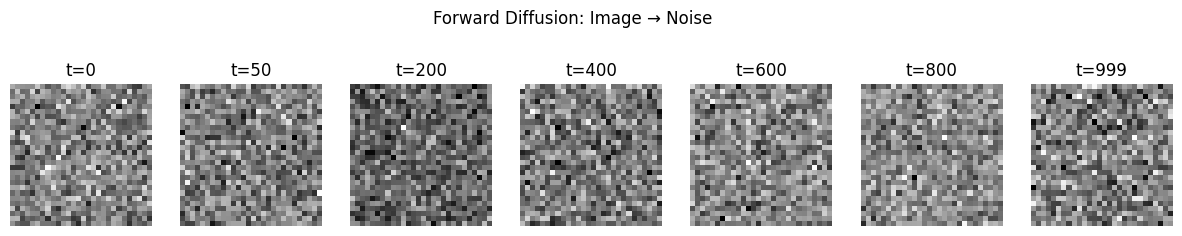

In [7]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Set up: batch of 1 image, shape (1, 1, 28, 28) like a grayscale MNIST image
x = torch.zeros((1, 1, 28, 28))  # a simple constant image for clarity

T = 1000  # total diffusion steps
betas = torch.linspace(1e-4, 0.02, T)  # linear beta schedule
alphas = 1.0 - betas
alpha_bars = torch.cumprod(alphas, dim=0)  # alpha_t_bar = product_{s=1}^t (1 - beta_s)

def q_sample(x, t):
    """
    Simulate z_t = sqrt(alpha_bar_t) * x + sqrt(1 - alpha_bar_t) * epsilon
    """
    sqrt_alpha_bar = torch.sqrt(alpha_bars[t])
    sqrt_one_minus_alpha_bar = torch.sqrt(1 - alpha_bars[t])
    eps = torch.randn_like(x)  # ε ~ N(0, I)
    z_t = sqrt_alpha_bar * x + sqrt_one_minus_alpha_bar * eps
    return z_t

# Choose some time steps
steps = [0, 50, 200, 400, 600, 800, 999]
plt.figure(figsize=(15, 3))
print(x)

fig, axes = plt.subplots(1, len(steps), figsize=(15, 3))
for i, t in enumerate(steps):
    z_t = q_sample(x, t)
    img = z_t[0, 0].detach().cpu().numpy()
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"t={t}")
    axes[i].axis('off')

plt.suptitle("Forward Diffusion: Image → Noise")
plt.show()


t = 0: Mean = 1.0000, Std = 0.0100
t = 50: Mean = 0.9850, Std = 0.1730
t = 200: Mean = 0.8112, Std = 0.5841
t = 400: Mean = 0.4406, Std = 0.8957
t = 600: Mean = 0.1629, Std = 0.9870
t = 800: Mean = 0.0400, Std = 1.0007
t = 999: Mean = 0.0026, Std = 1.0012


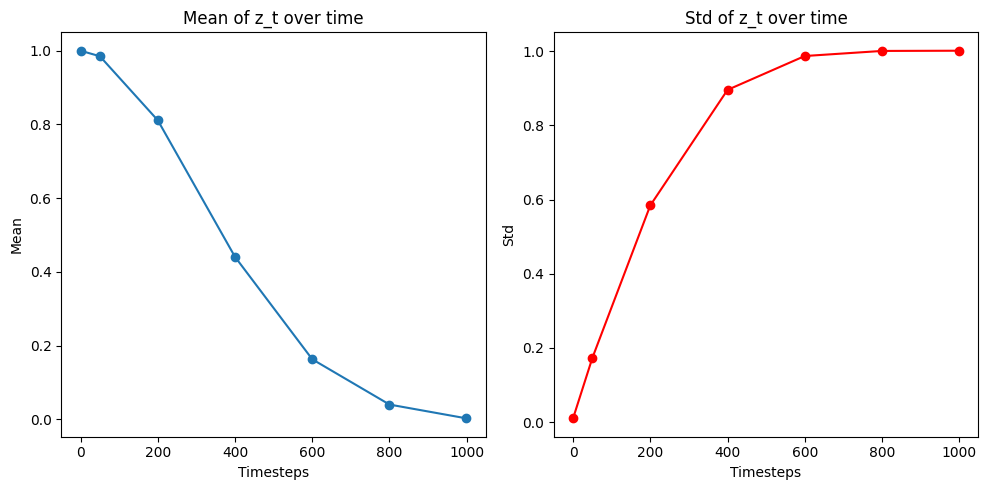

In [15]:
import torch
import matplotlib.pyplot as plt

# Parameters
T = 1000  # Total timesteps
N = 100000  # Number of samples to get good stats
betas = torch.linspace(1e-4, 0.02, T)  # Beta schedule
alphas = 1.0 - betas
alpha_bars = torch.cumprod(alphas, dim=0)  # Alpha_t_bar (product over betas)

# Input "image" is just constant 1s for simplicity
x = torch.ones(N)

# Calculate and store mean and std at various timesteps
timesteps = [0, 50, 200, 400, 600, 800, 999]  # Various timeframes
means = []
stds = []

# Loop over timesteps and compute z_t
for t in timesteps:
    # Calculate z_t using the closed-form formula
    eps = torch.randn_like(x)  # Random noise
    z_t = torch.sqrt(alpha_bars[t]) * x + torch.sqrt(1 - alpha_bars[t]) * eps

    # Compute stats (mean and std)
    means.append(z_t.mean().item())
    stds.append(z_t.std().item())

# Print the results
for i, t in enumerate(timesteps):
    print(f"t = {t}: Mean = {means[i]:.4f}, Std = {stds[i]:.4f}")

# Plot mean and std over time
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(timesteps, means, marker='o')
plt.title('Mean of z_t over time')
plt.xlabel('Timesteps')
plt.ylabel('Mean')

plt.subplot(1, 2, 2)
plt.plot(timesteps, stds, marker='o', color='r')
plt.title('Std of z_t over time')
plt.xlabel('Timesteps')
plt.ylabel('Std')

plt.tight_layout()
plt.show()


0.9999999999999999
Area under the product Gaussian: 1.0000


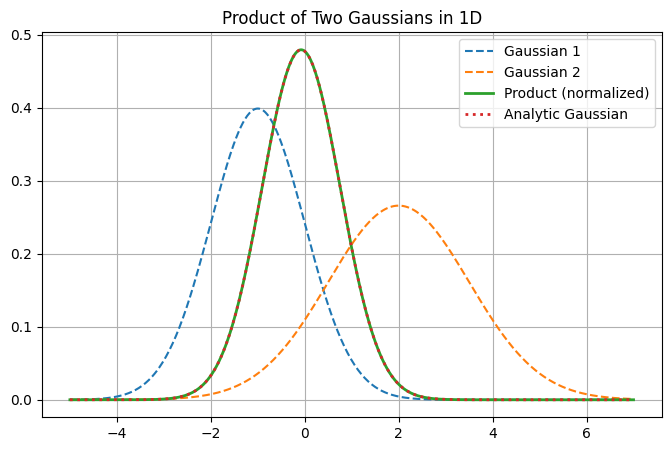

Expected product Gaussian mean ≈ -0.08, std ≈ 0.83


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define two 1D Gaussians
mu1, sigma1 = -1, 1
mu2, sigma2 = 2, 1.5

# Create range of x values
x = np.linspace(-5, 7, 500)

# Evaluate the two Gaussians
g1 = norm.pdf(x, mu1, sigma1)
g2 = norm.pdf(x, mu2, sigma2)

# Pointwise product
product = g1 * g2

# Normalize the product so it integrates to 1
product /= np.trapz(product, x)
aa = np.trapz(product, x)
print(np.trapz(product, x))
print(f"Area under the product Gaussian: {aa:.4f}")
# Compute the equivalent Gaussian analytically
precision1 = 1 / sigma1**2
precision2 = 1 / sigma2**2

mu_new = (mu1 * precision1 + mu2 * precision2) / (precision1 + precision2)
sigma_new = np.sqrt(1 / (precision1 + precision2))
gaussian_product = norm.pdf(x, mu_new, sigma_new)

# Plot all
plt.figure(figsize=(8, 5))
plt.plot(x, g1, label='Gaussian 1', linestyle='--')
plt.plot(x, g2, label='Gaussian 2', linestyle='--')
plt.plot(x, product, label='Product (normalized)', linewidth=2)
plt.plot(x, gaussian_product, label='Analytic Gaussian', linewidth=2, linestyle=':')
plt.title("Product of Two Gaussians in 1D")
plt.legend()
plt.grid(True)
plt.show()

# Print parameters
print(f"Expected product Gaussian mean ≈ {mu_new:.2f}, std ≈ {sigma_new:.2f}")


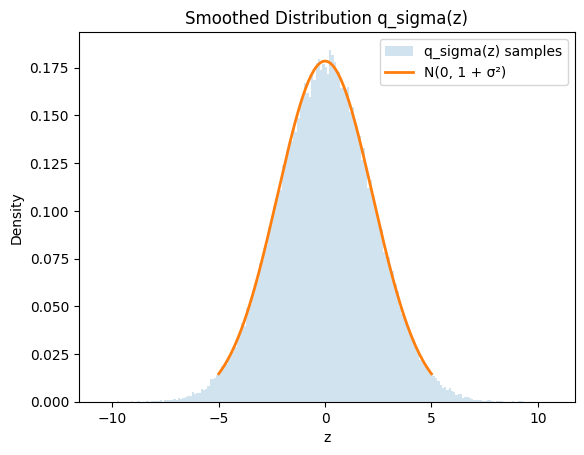

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Data distribution: p(x) ~ N(0, 1)
x_samples = np.random.normal(loc=0, scale=1, size=100000)

# Noise level
sigma = 2

# Create z = x + noise
noise = np.random.normal(loc=0, scale=sigma, size=100000)
z_samples = x_samples + noise  # Now from q_sigma(z)

# Plot histograms
x_range = np.linspace(-5, 5, 1000)
plt.hist(z_samples, bins=200, density=True, alpha=0.2, label="q_sigma(z) samples")

# Plot true convolved distribution (should be N(0, 1 + sigma^2))
true_std = np.sqrt(1 + sigma**2)
plt.plot(x_range, norm.pdf(x_range, loc=0, scale=true_std), label="N(0, 1 + σ²)", lw=2)

plt.legend()
plt.title("Smoothed Distribution q_sigma(z)")
plt.xlabel("z")
plt.ylabel("Density")
plt.show()


c:\Users\manis\anaconda3\envs\new_torch\Lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\manis\AppData\Local\Temp\ipykernel_13632\64297229.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 5))
c:\Users\manis\anaconda3\envs\new_torch\Lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (ma

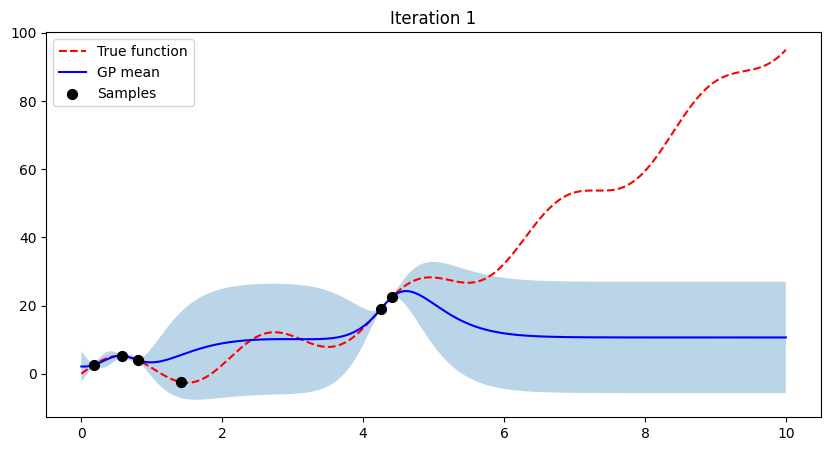

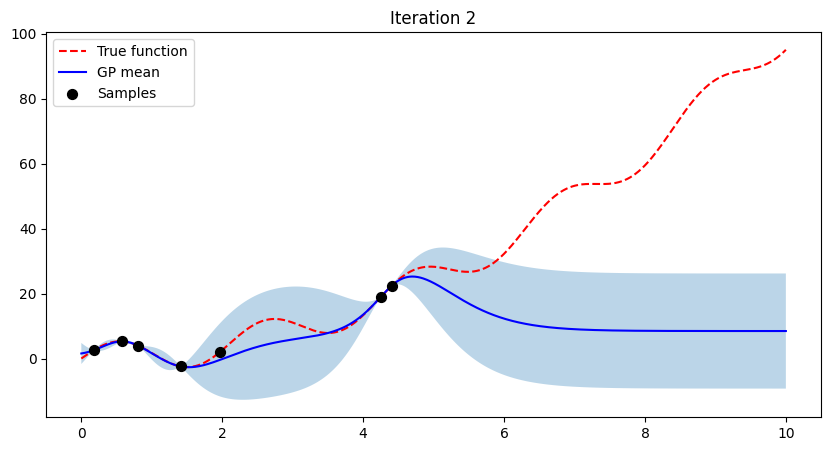

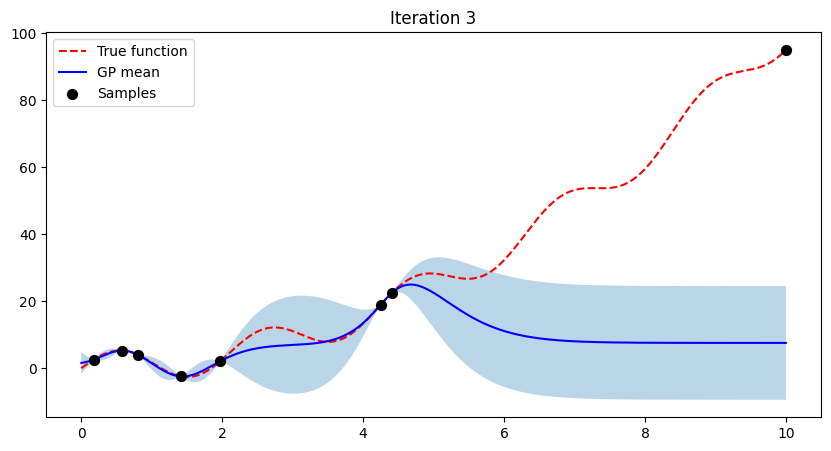

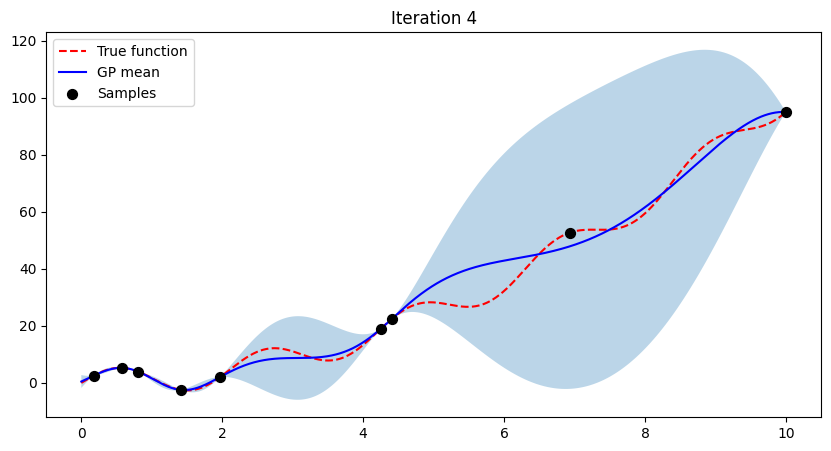

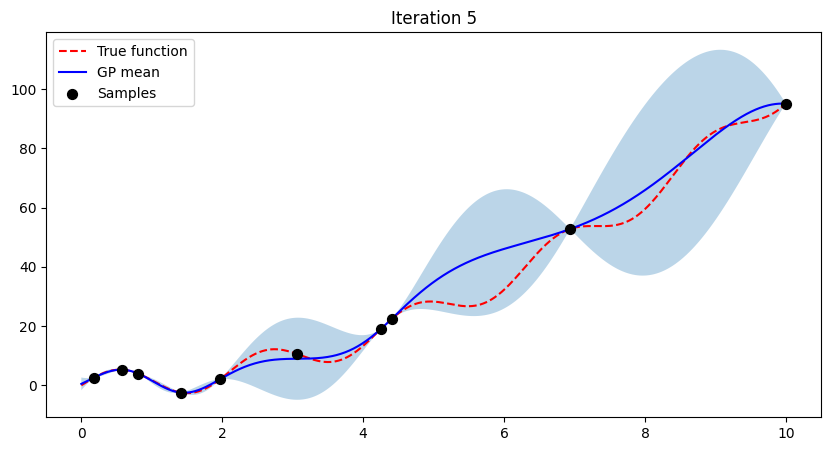

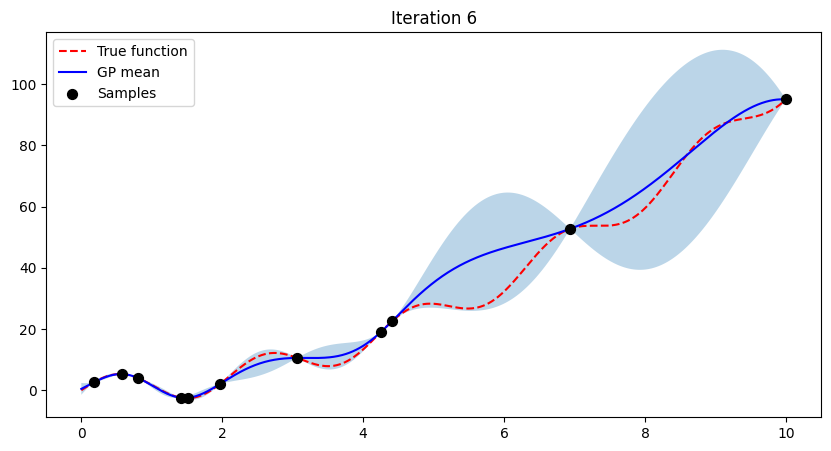

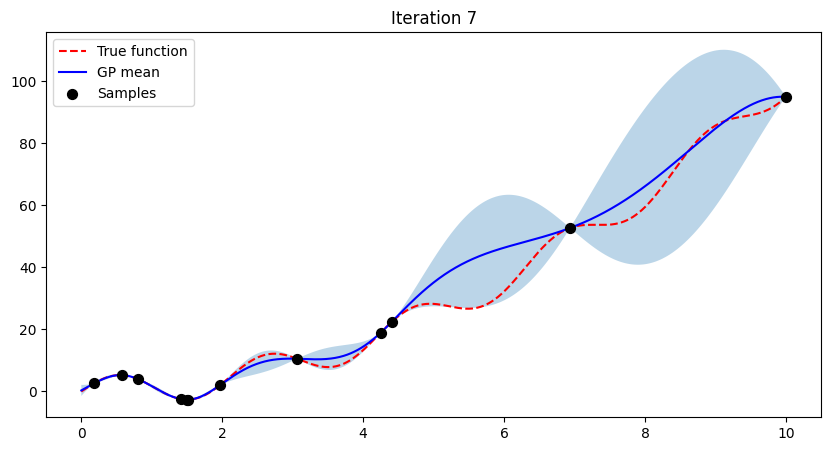

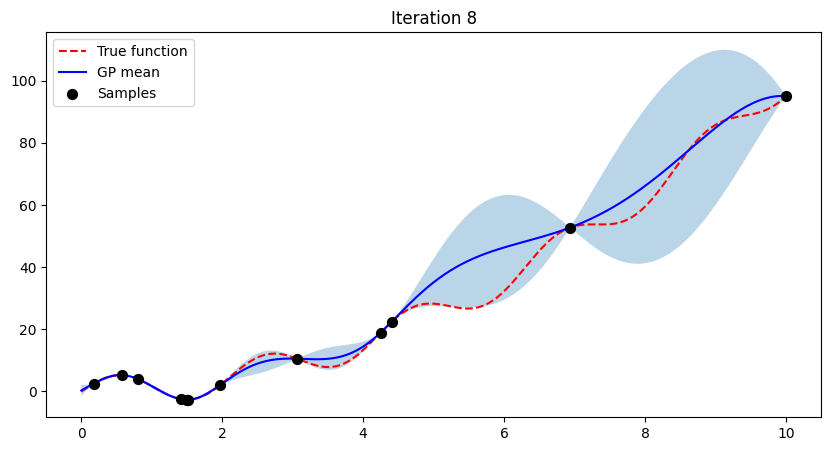

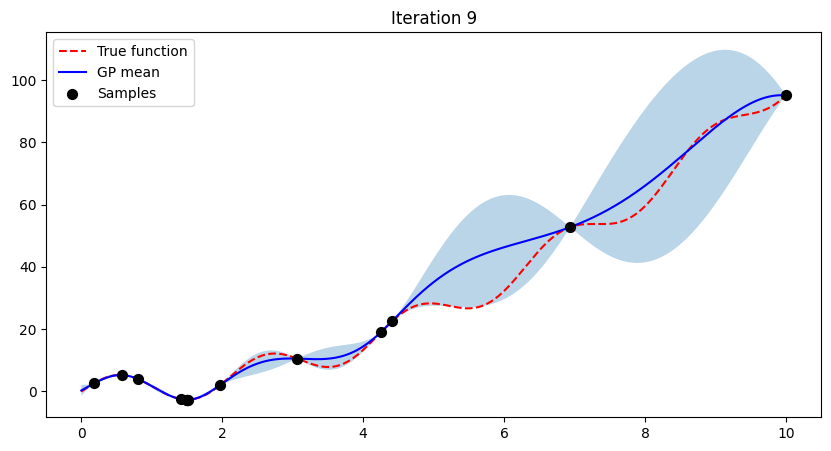

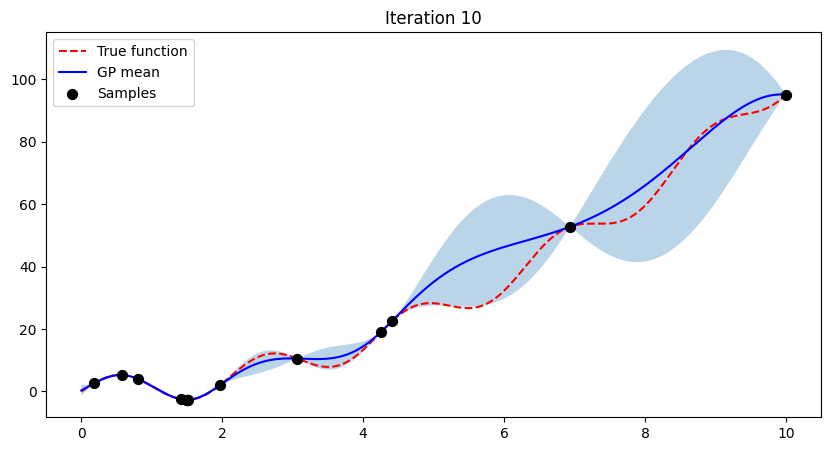

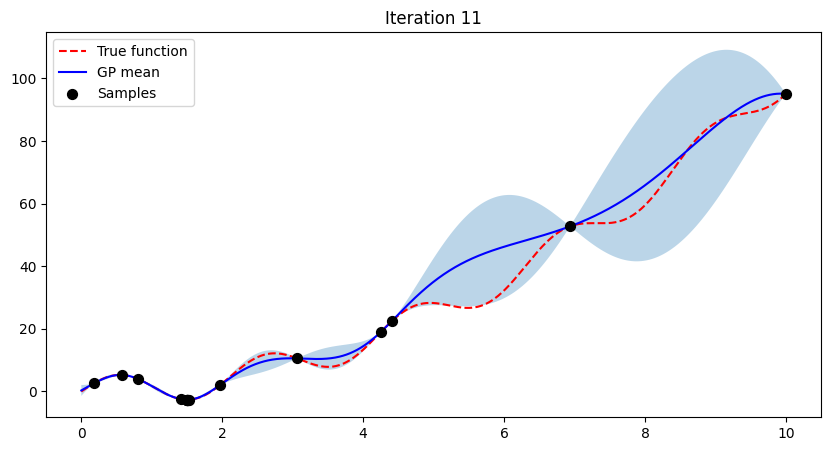

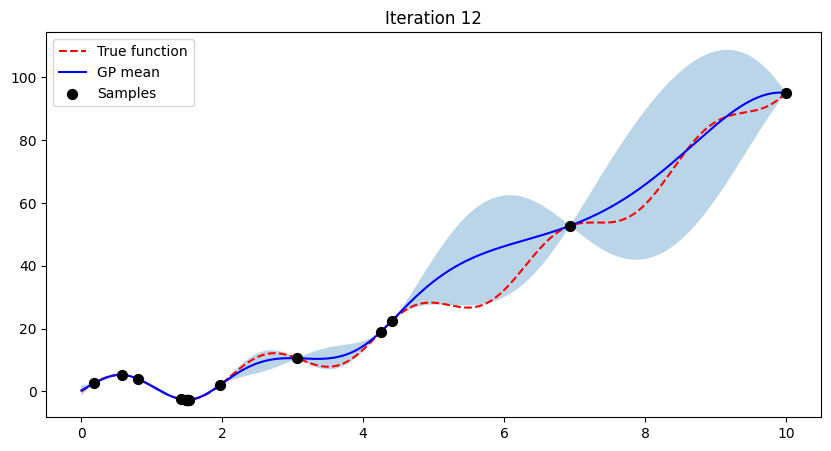

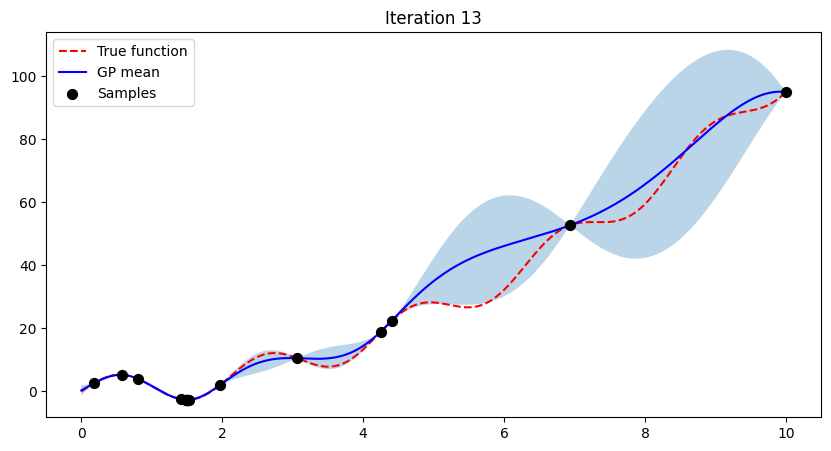

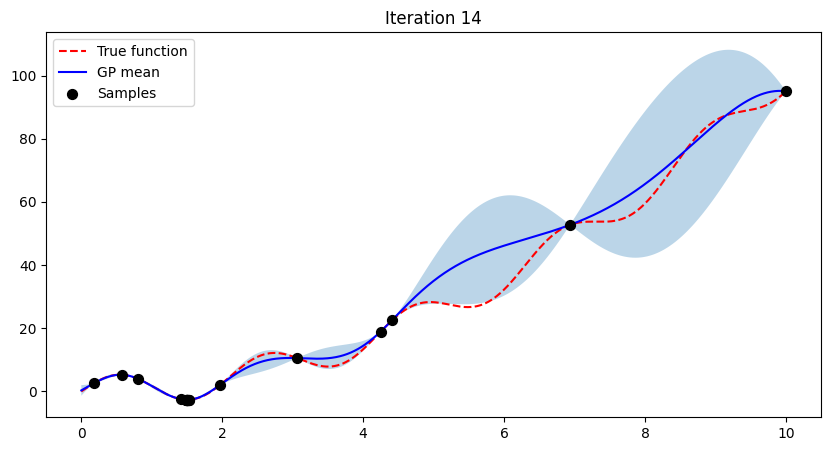

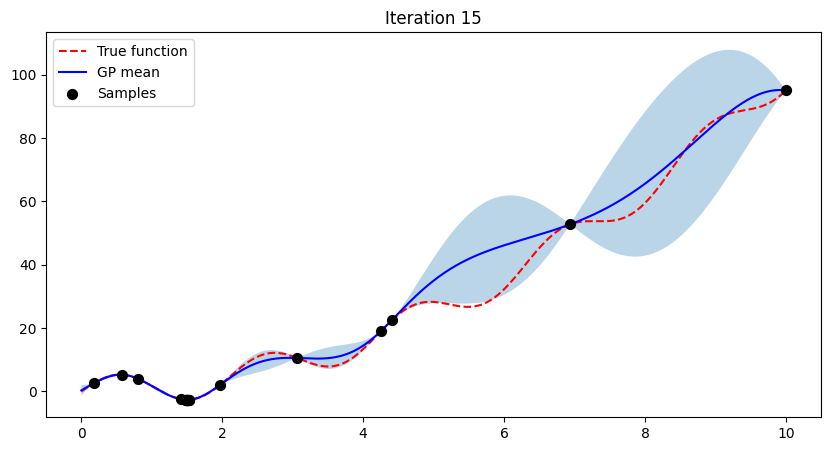

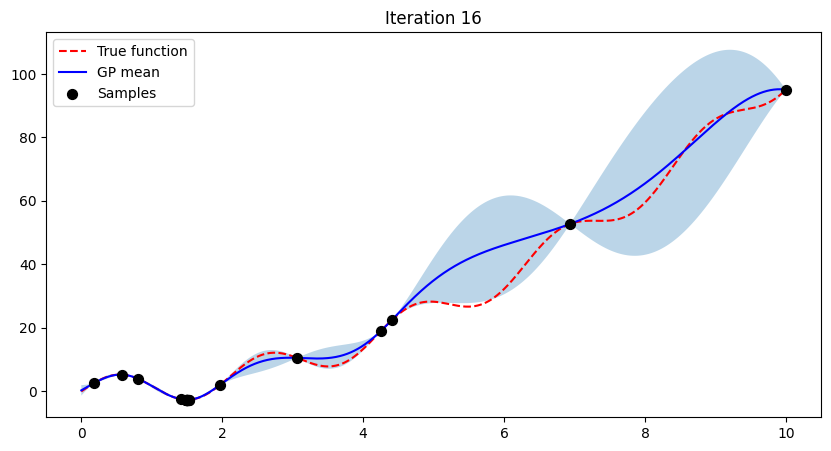

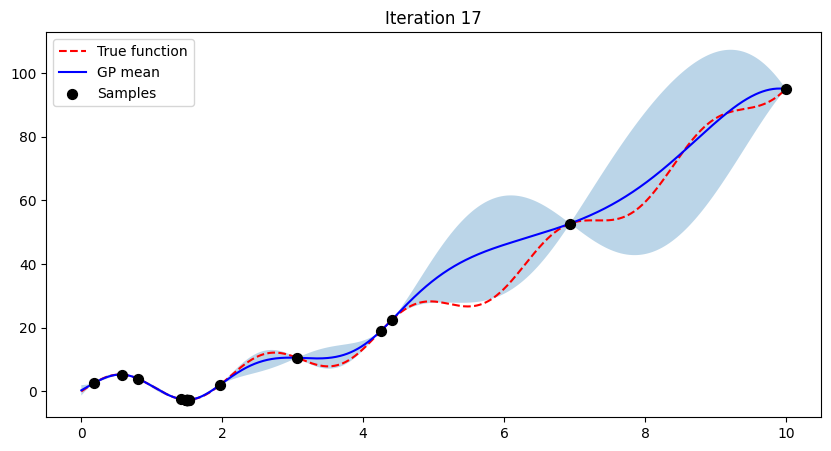

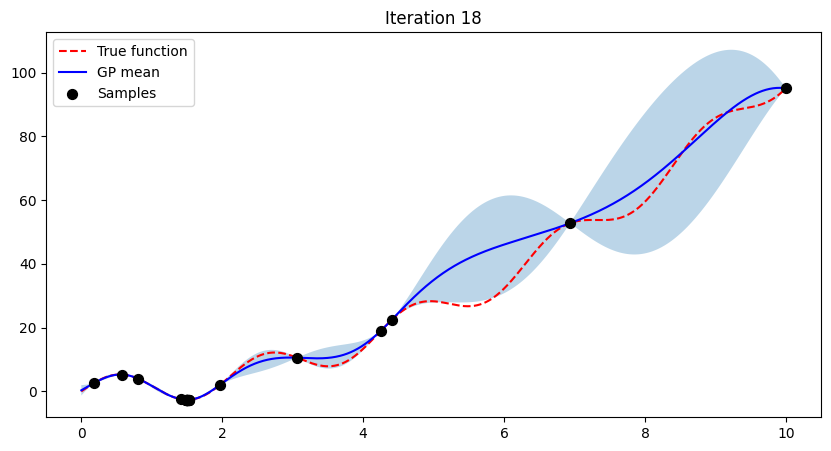

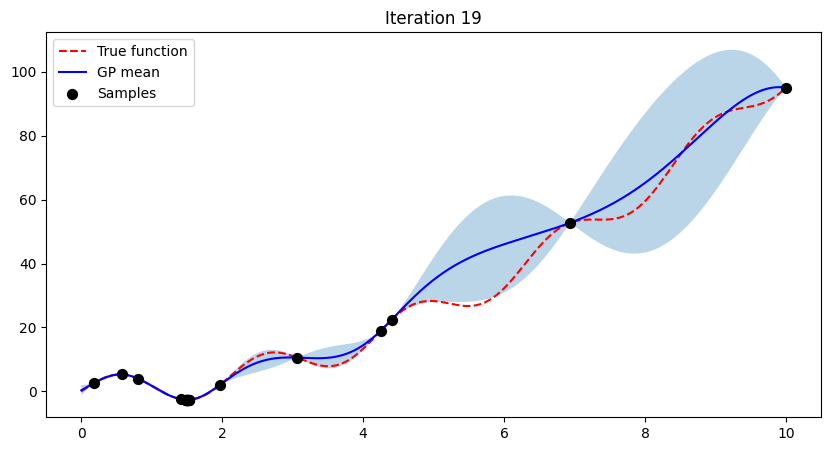

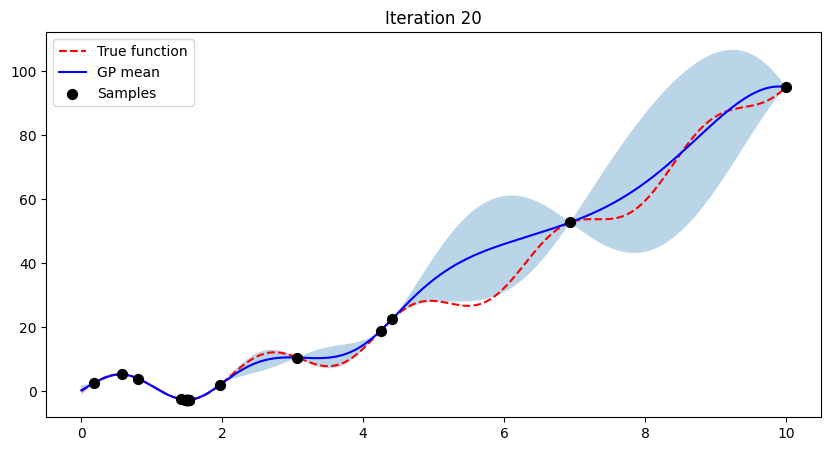

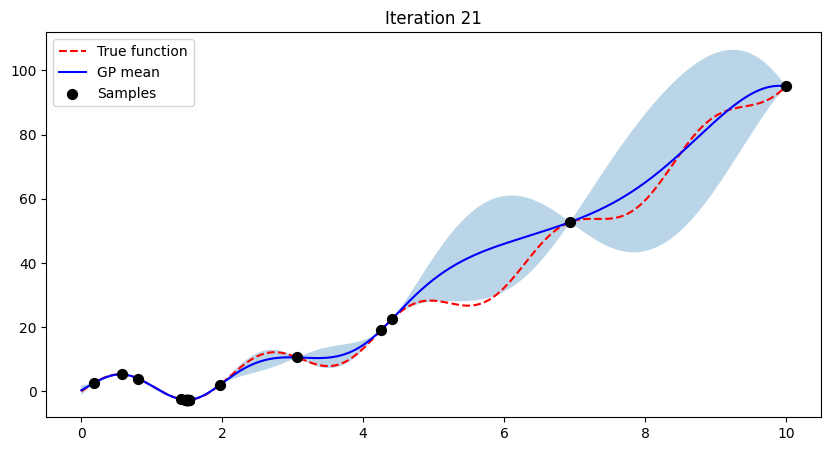

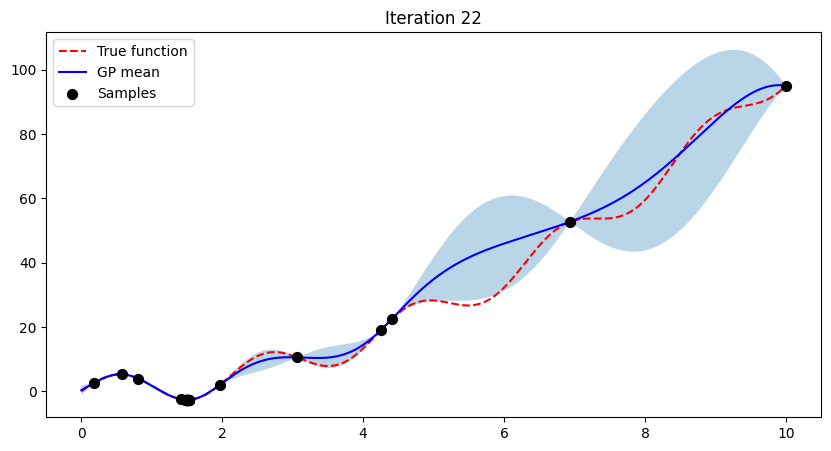

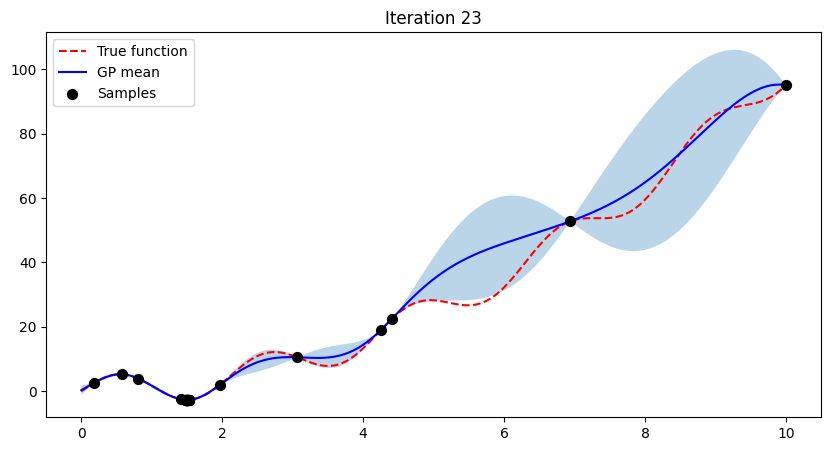

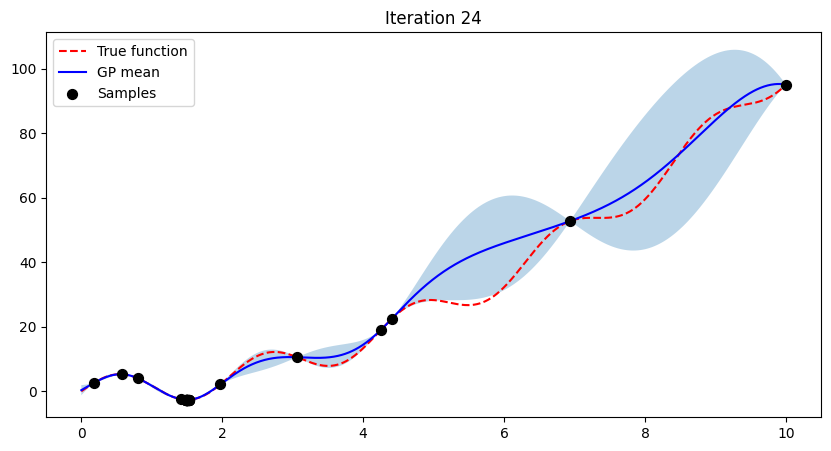

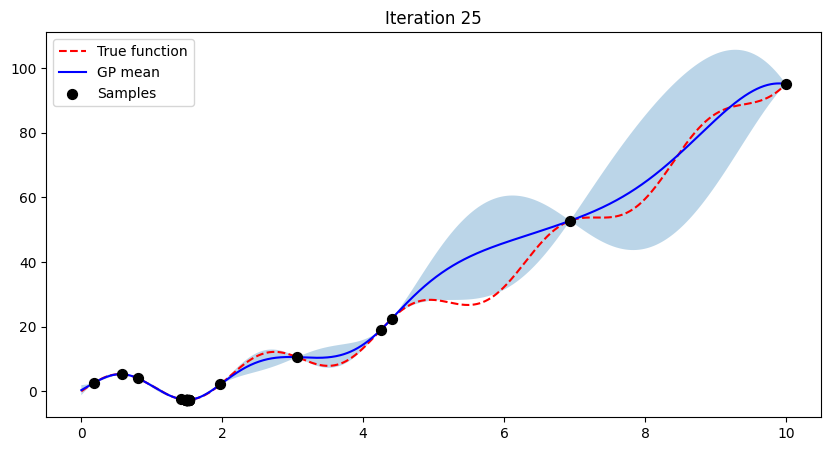

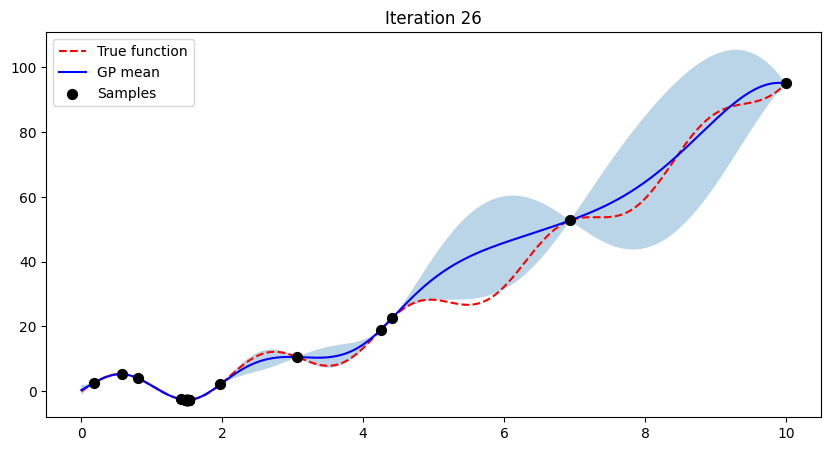

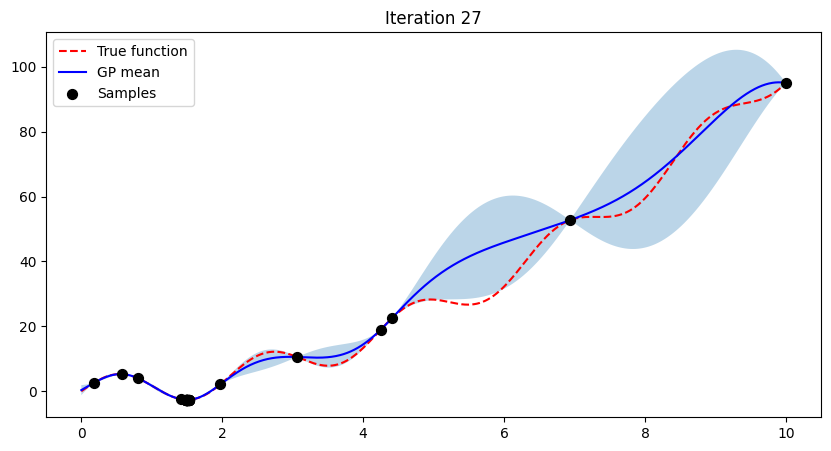

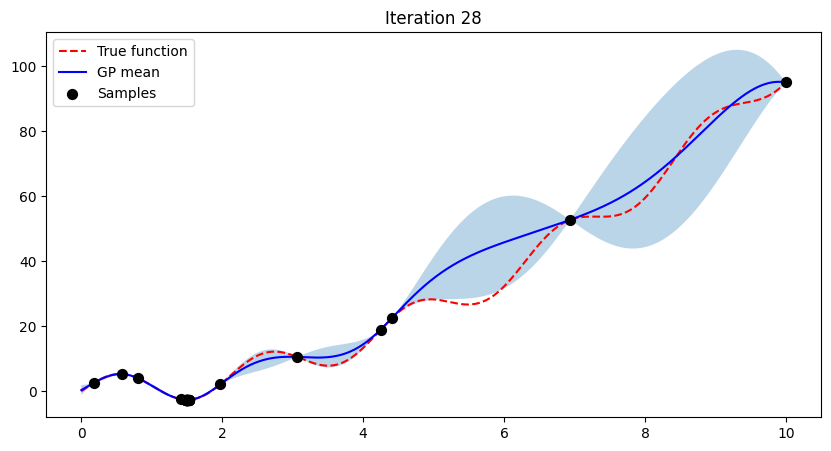

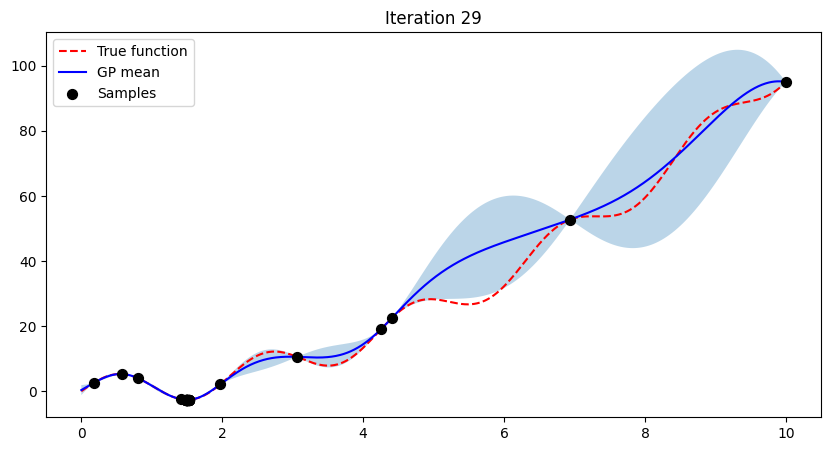

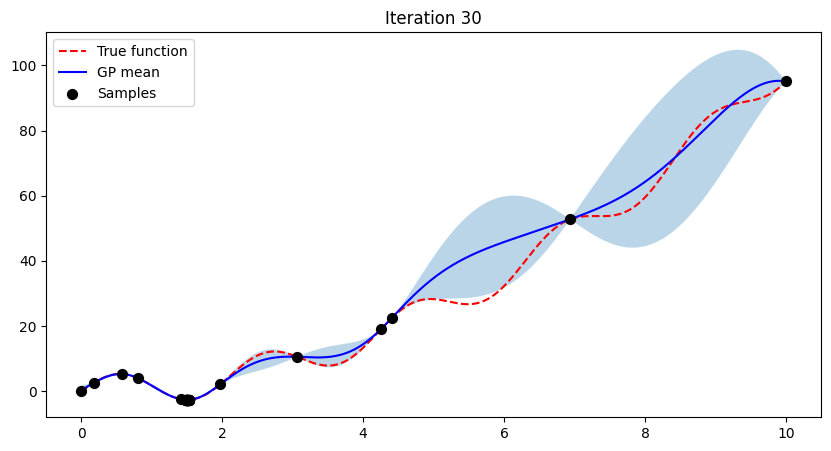

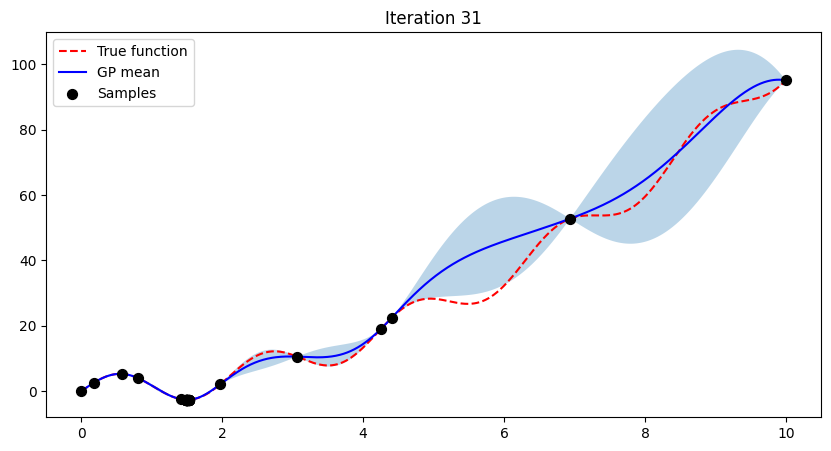

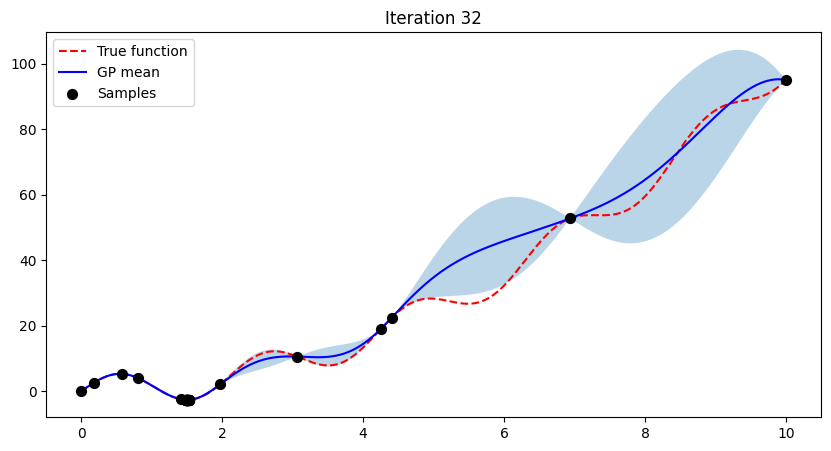

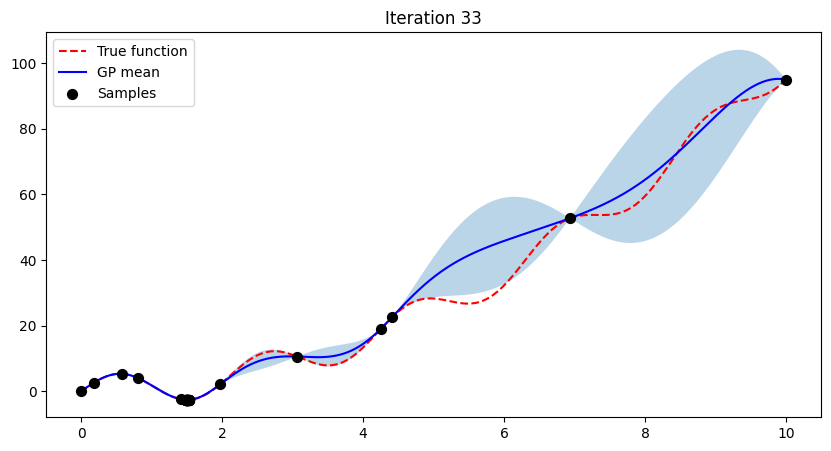

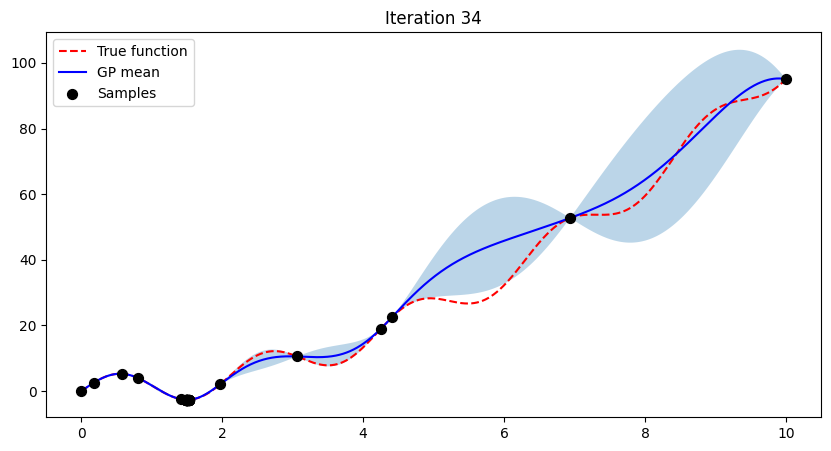

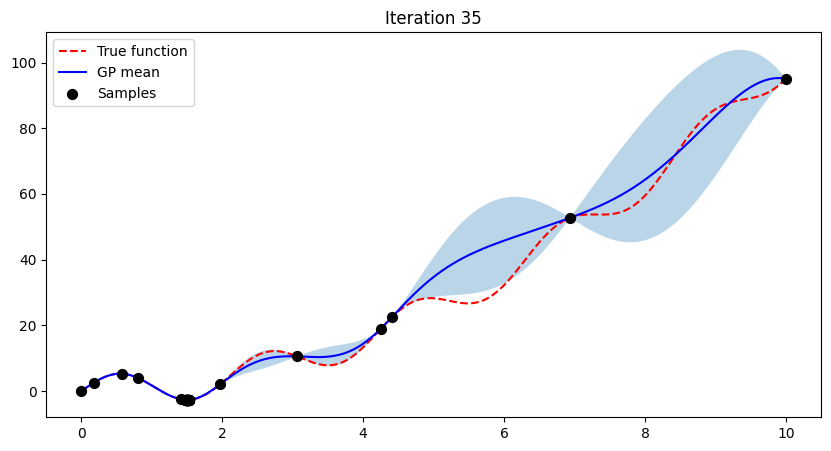

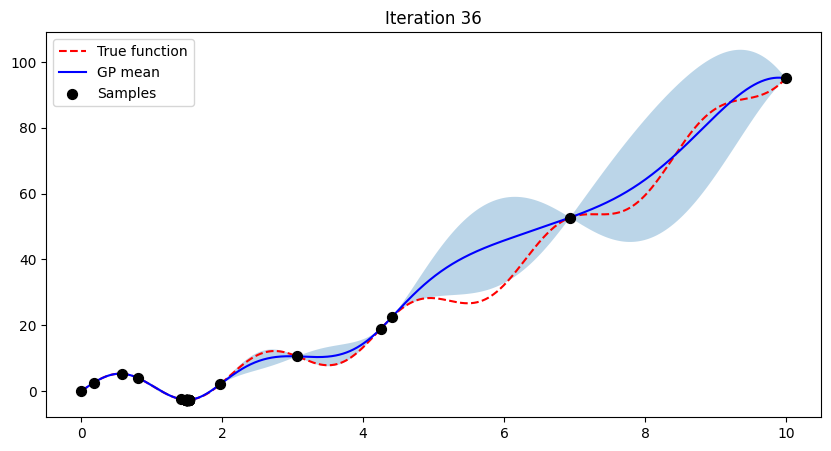

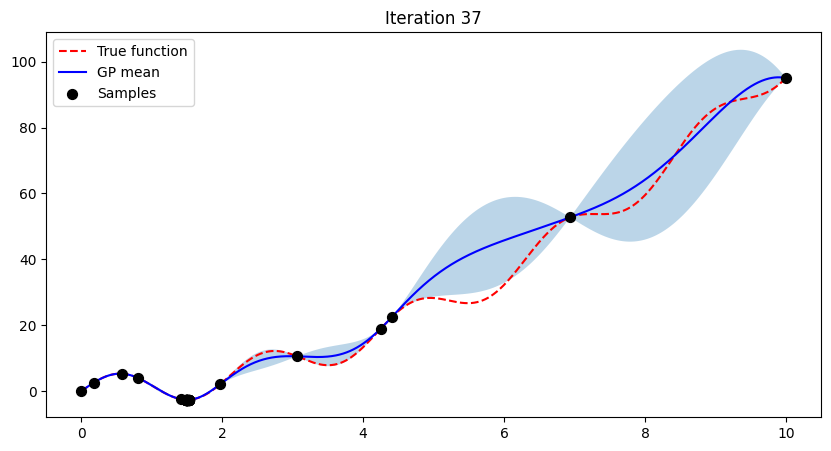

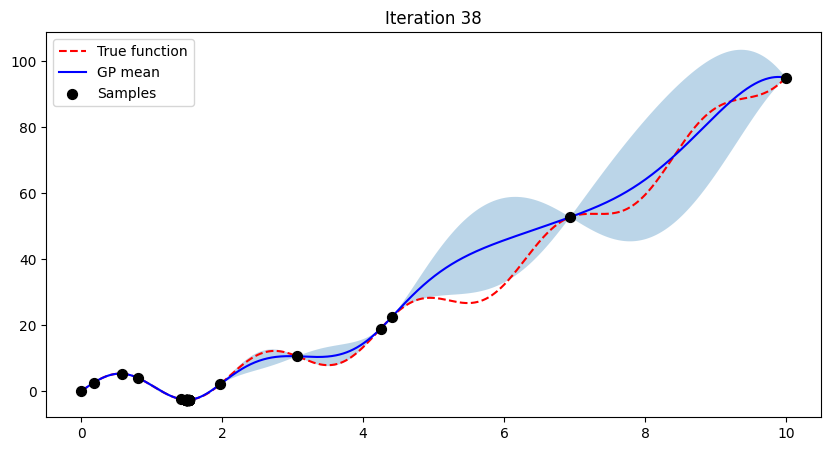

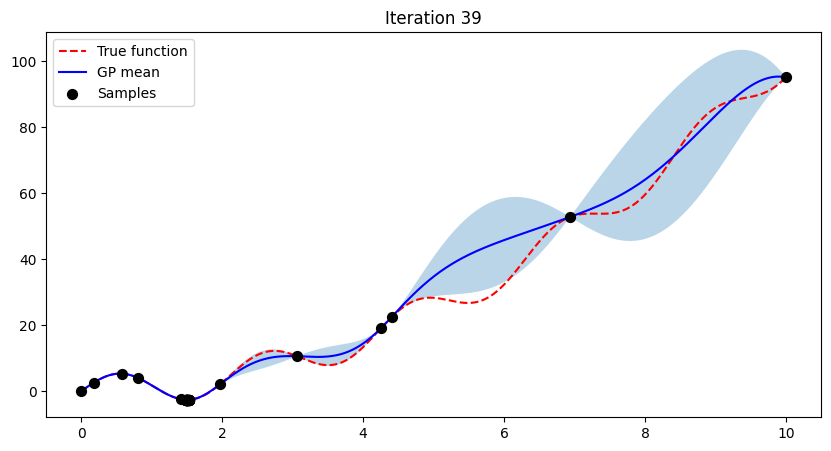

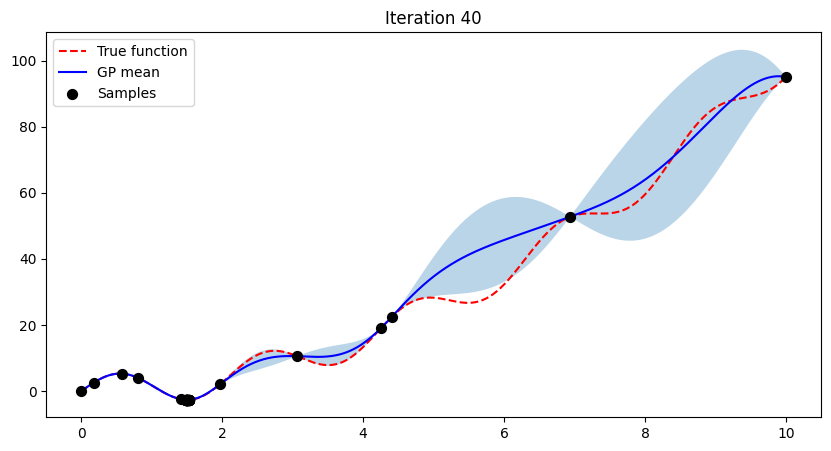

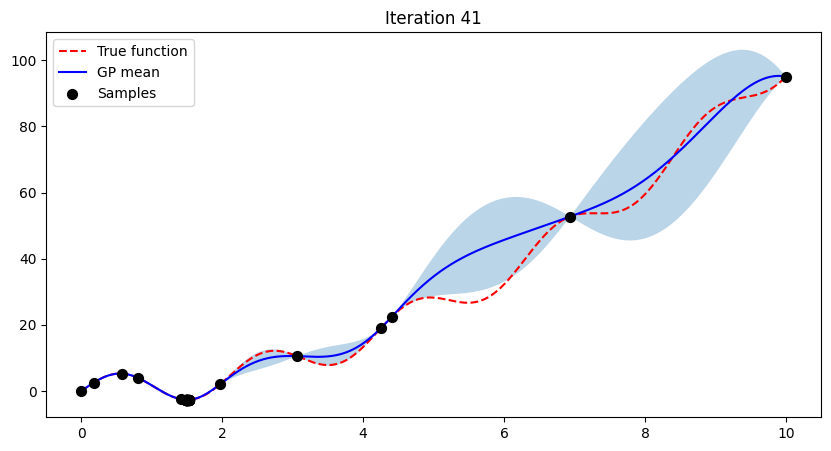

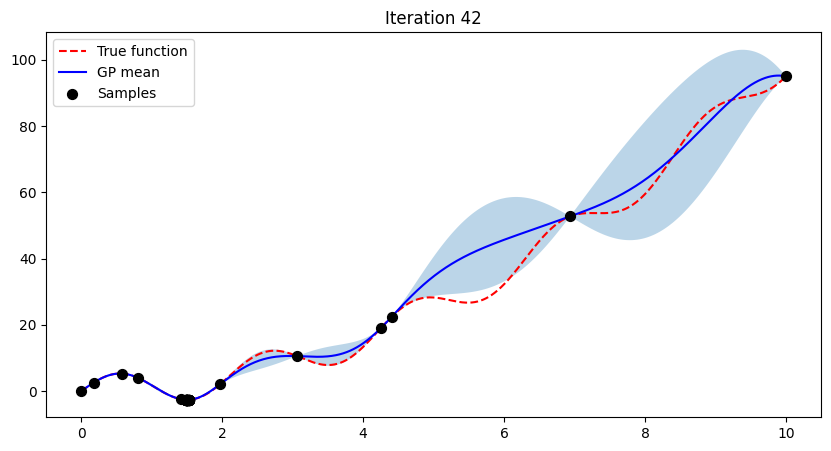

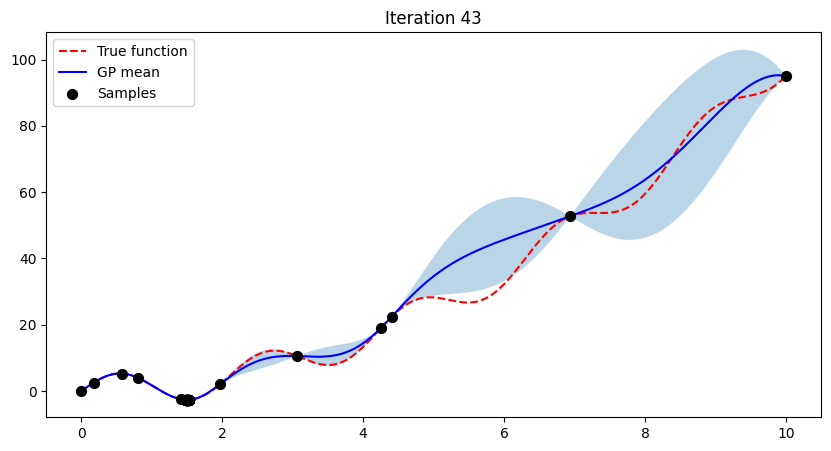

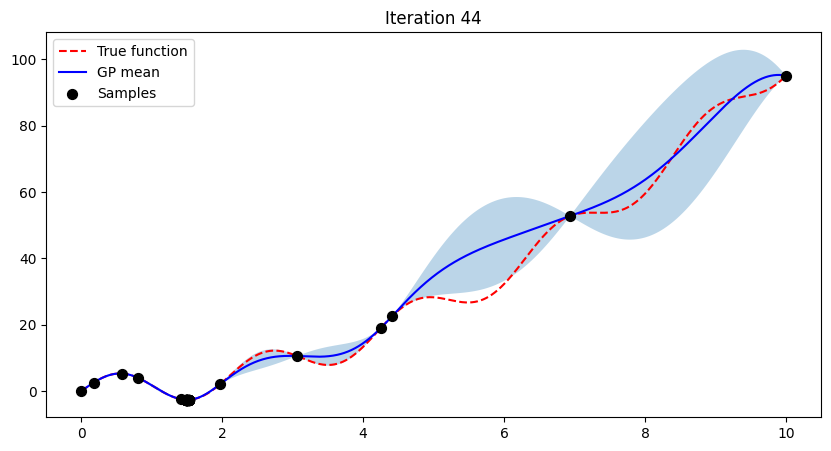

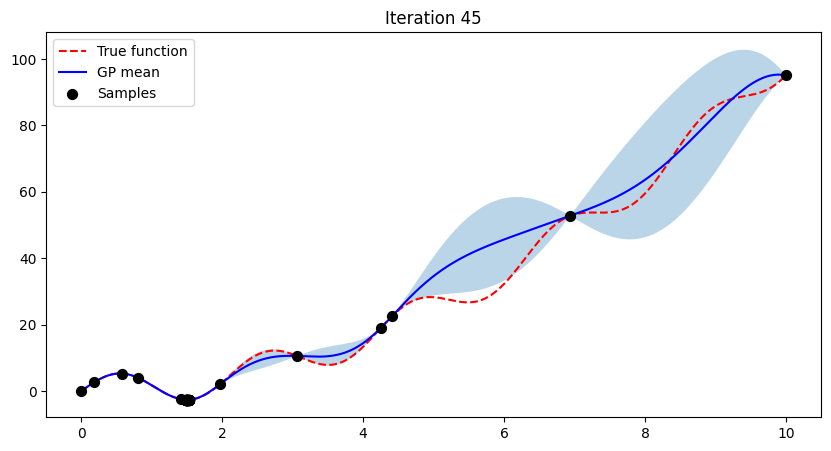

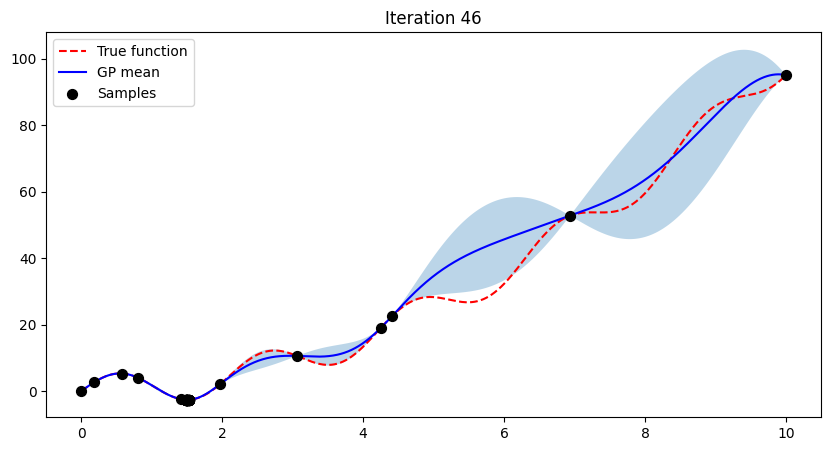

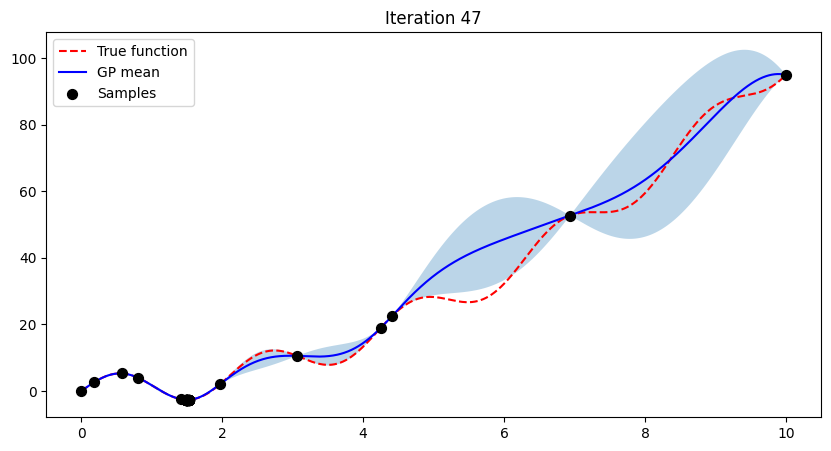

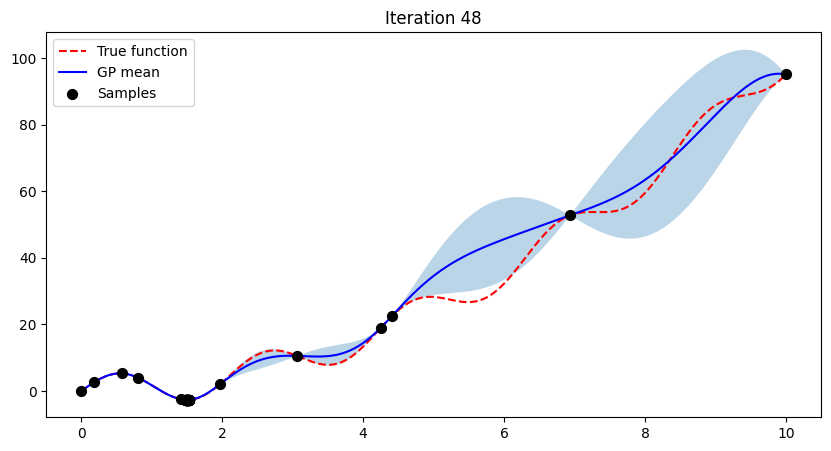

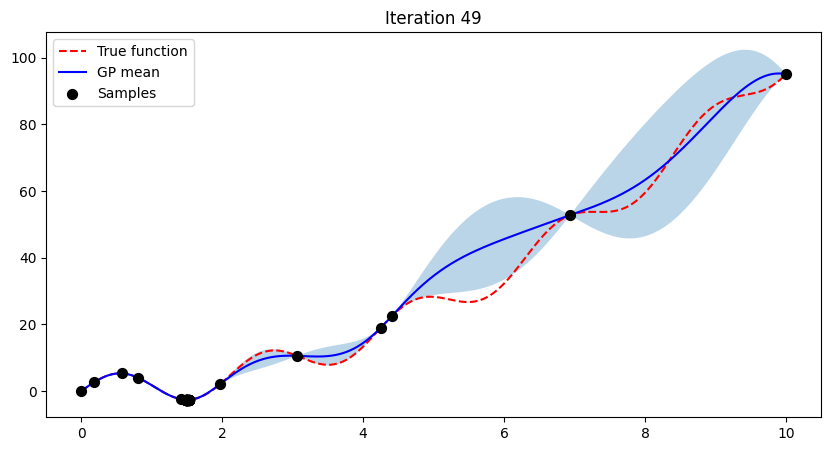

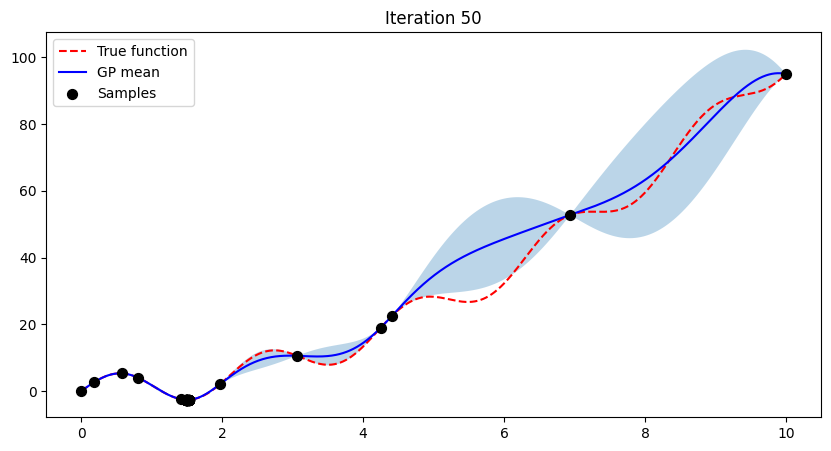

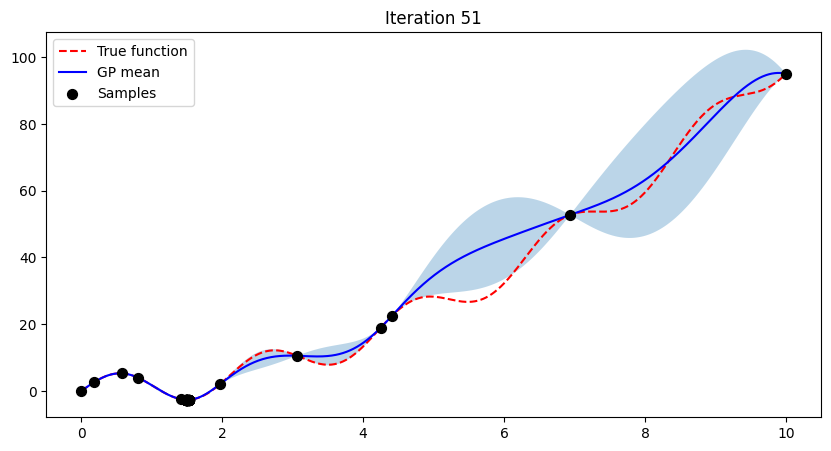

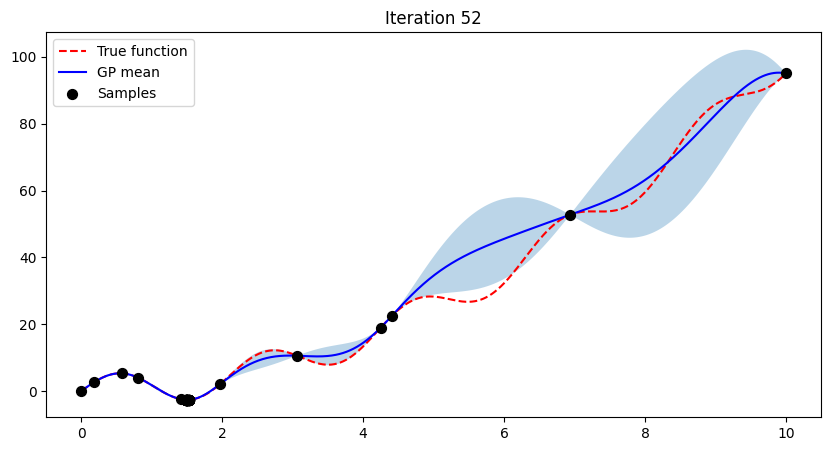

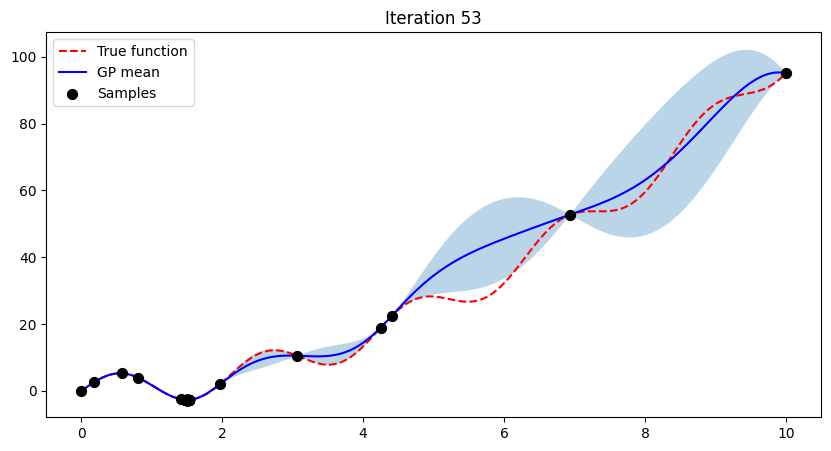

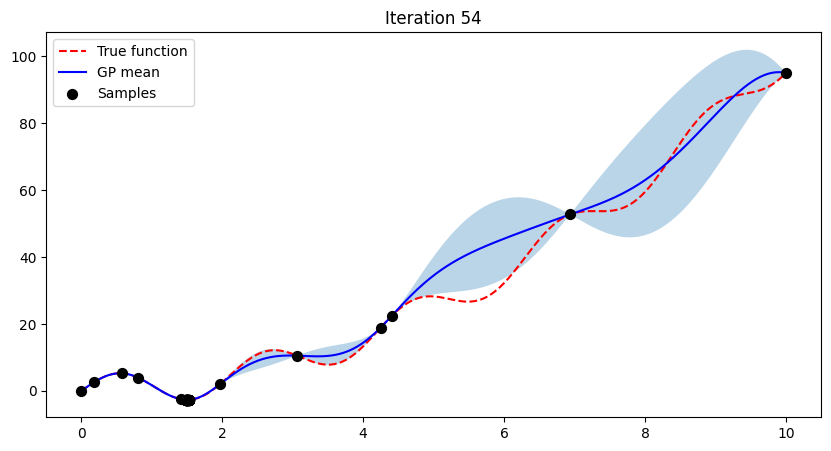

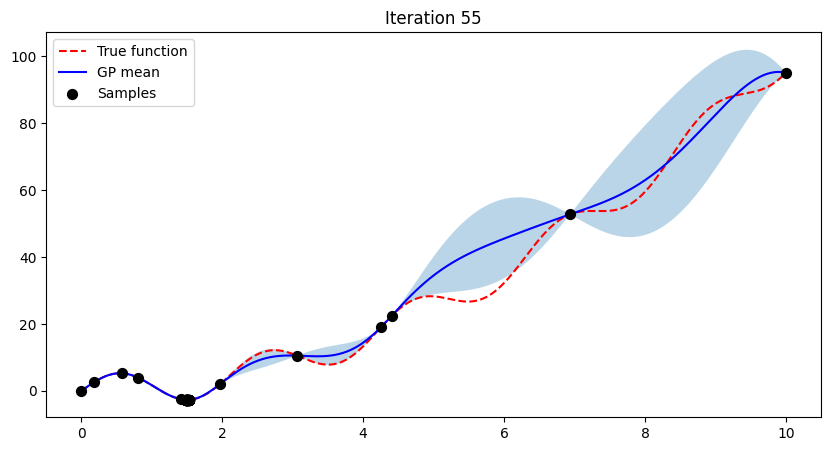

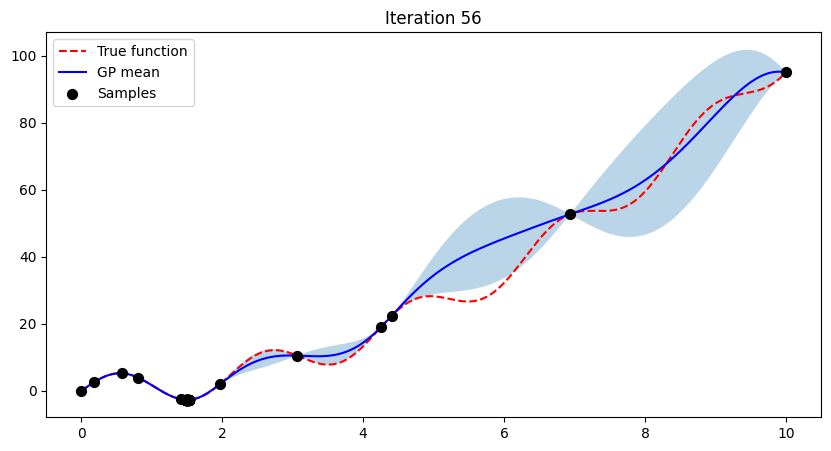

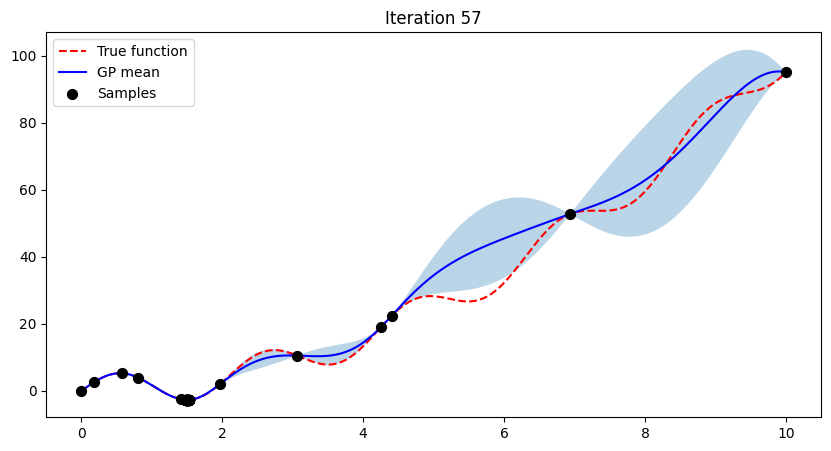

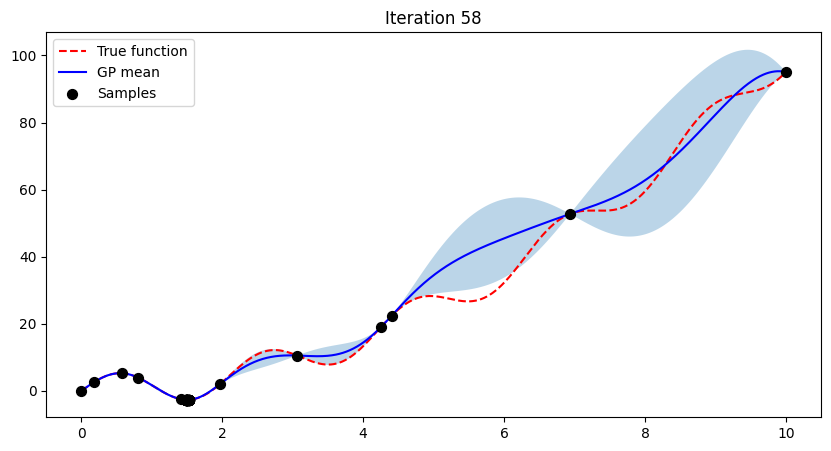

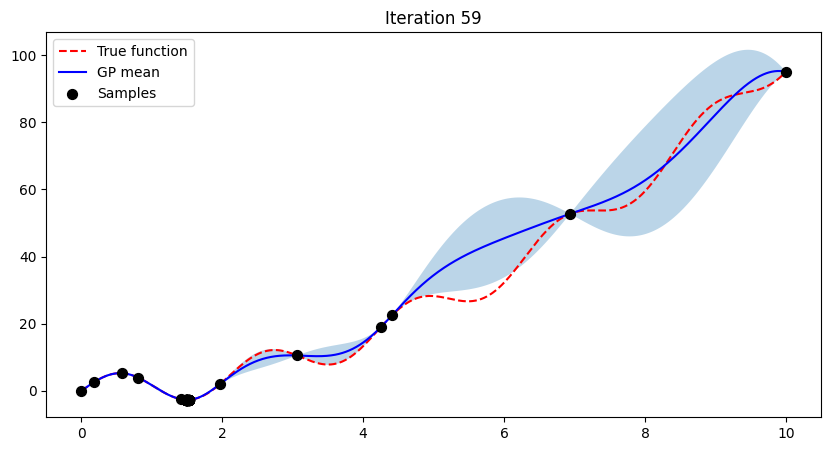

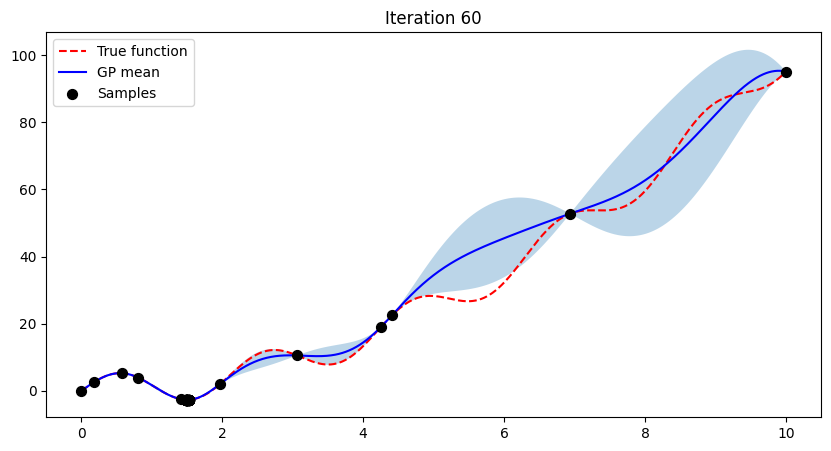

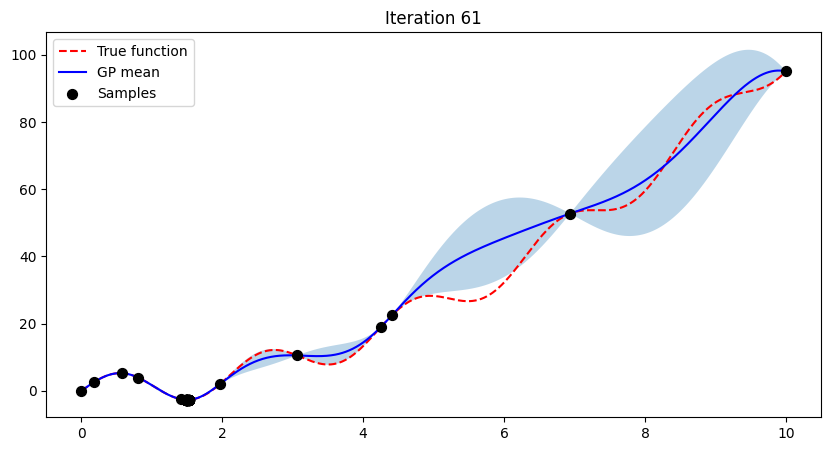

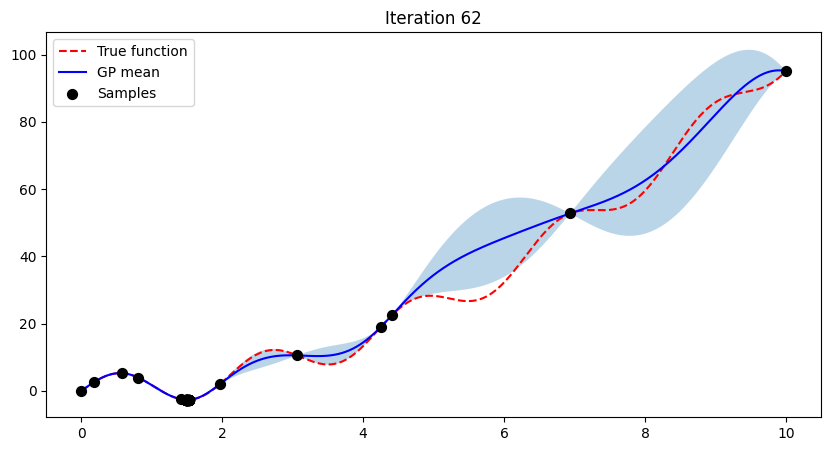

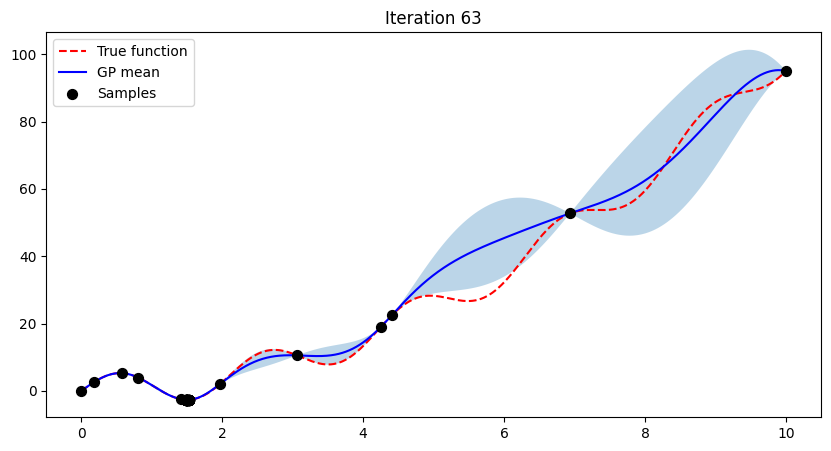

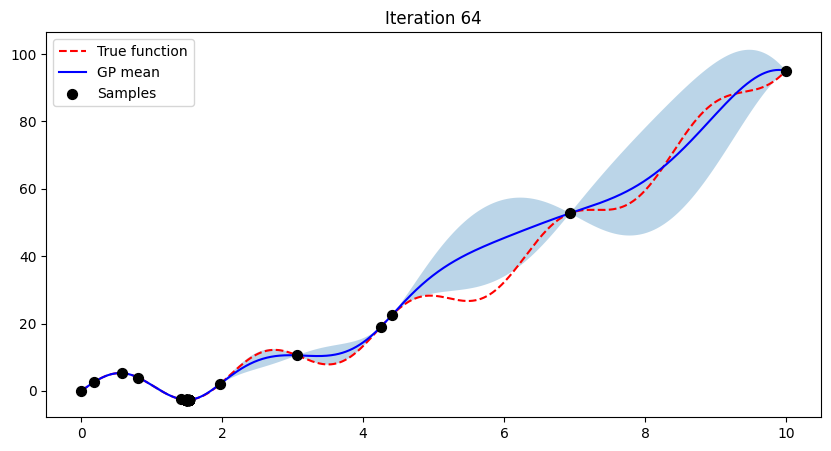

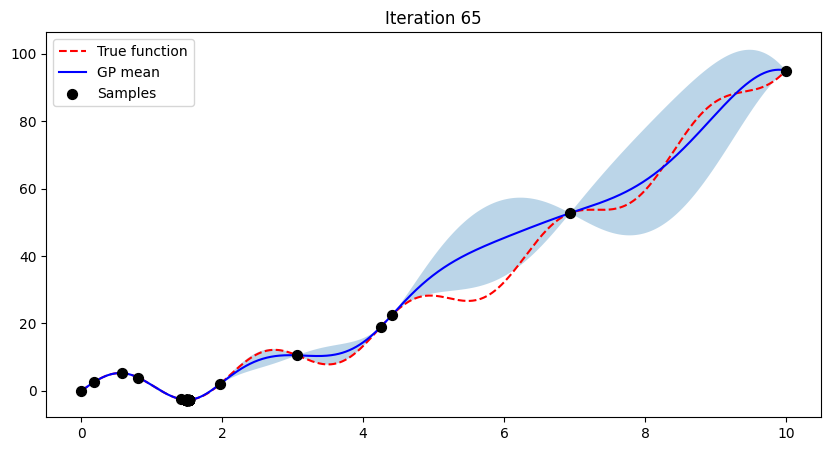

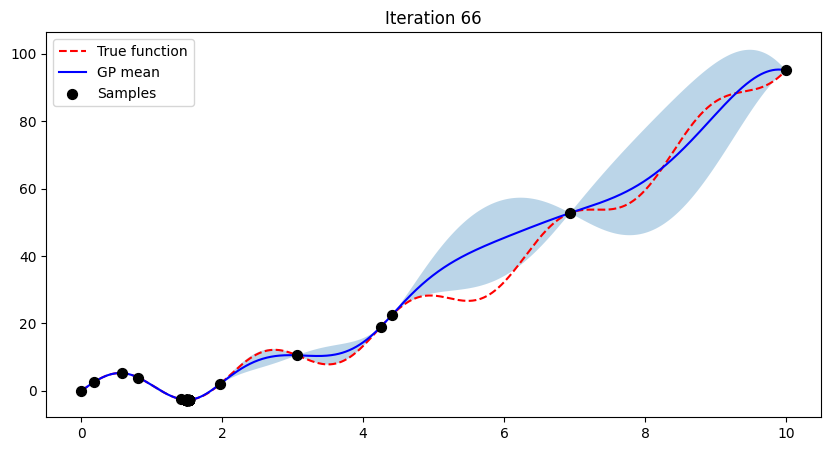

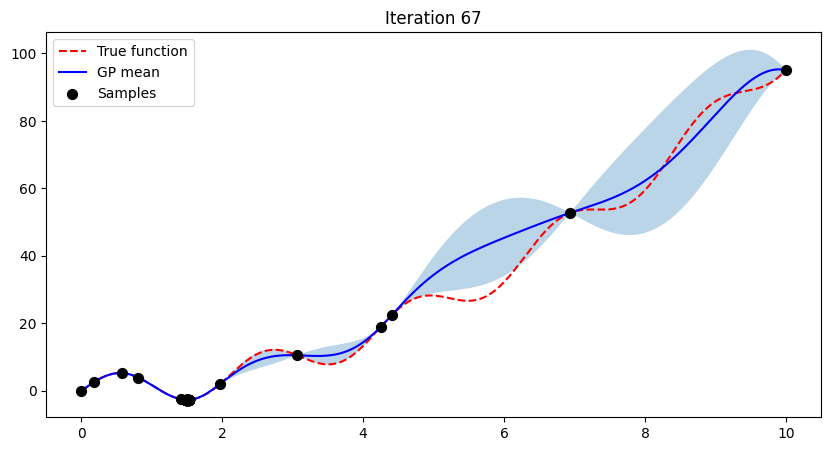

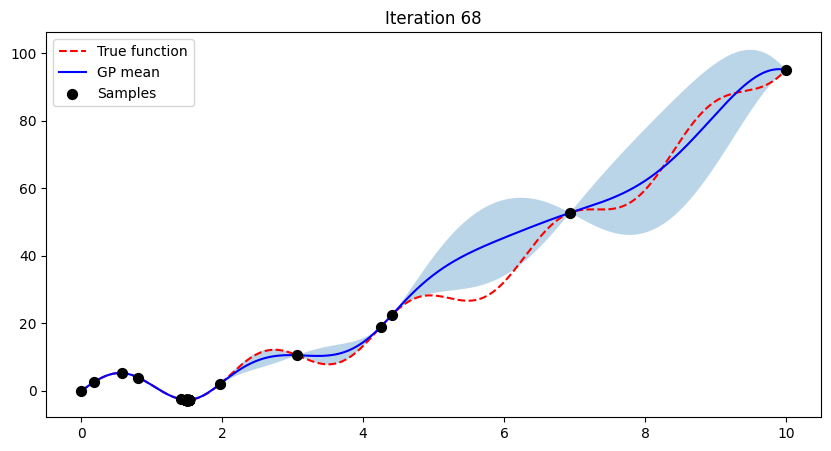

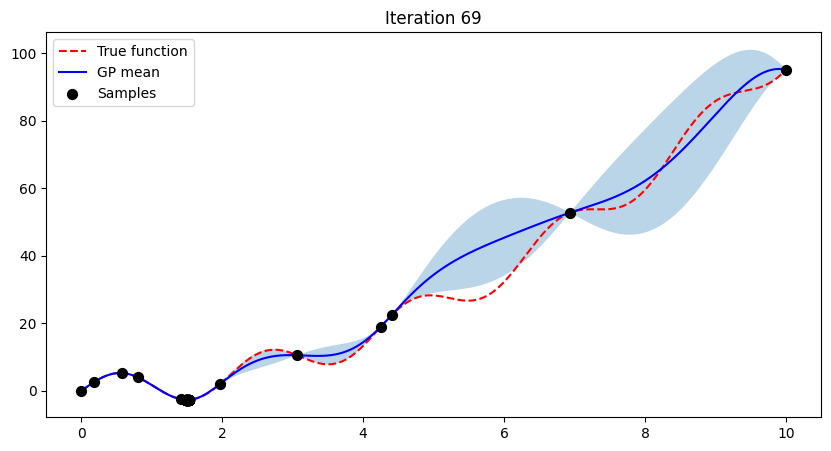

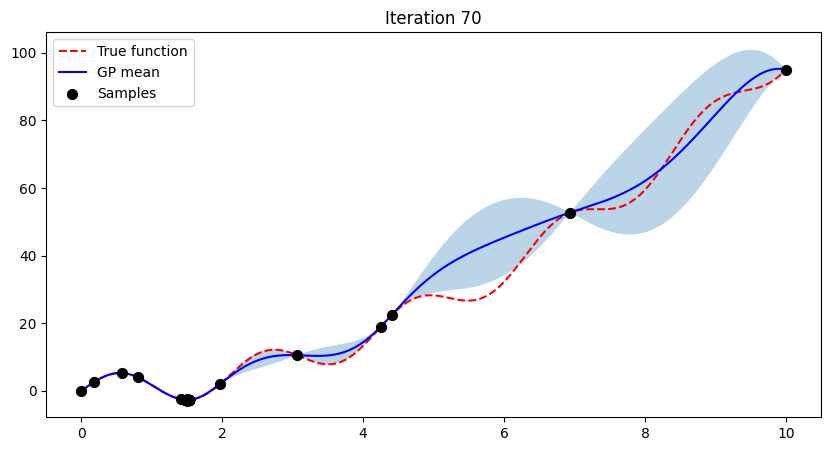

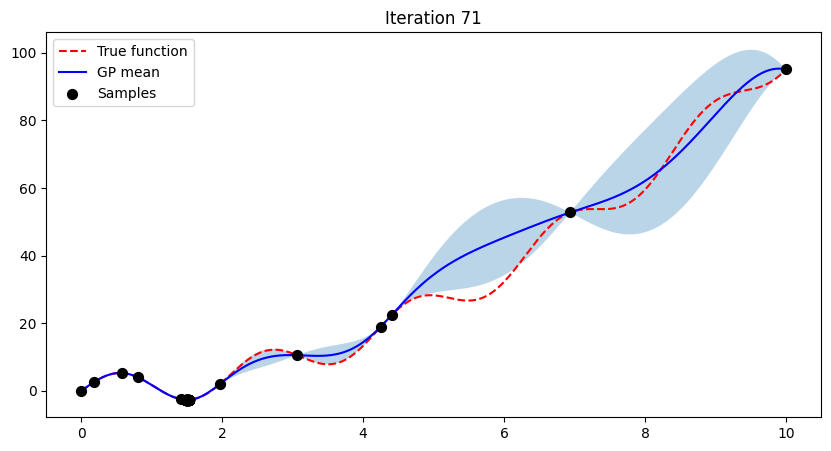

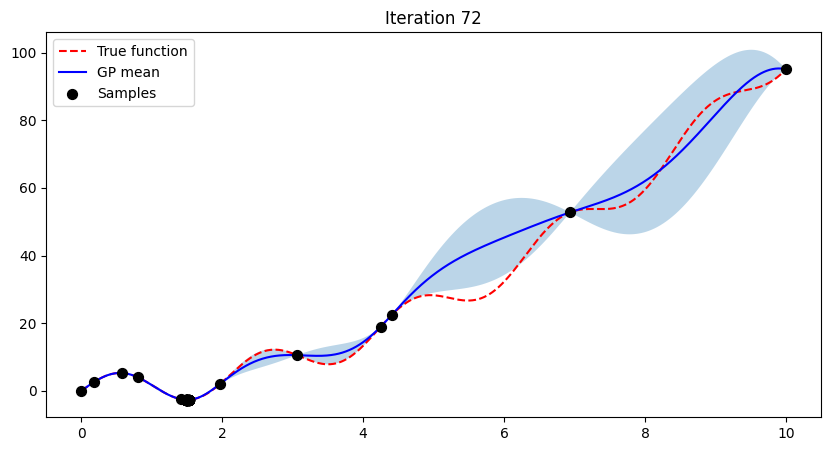

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from scipy.stats import norm

# Define the black-box function to minimize
def f(x):
    return 5*np.sin(3 * x) + x**2 

# Acquisition function: Expected Improvement (EI)
def expected_improvement(X, X_sample, Y_sample, gp, xi=0.01):
    mu, sigma = gp.predict(X, return_std=True)
    mu_sample_opt = np.min(Y_sample)

    with np.errstate(divide='warn'):
        imp = mu_sample_opt - mu - xi
        Z = imp / sigma
        ei = imp * norm.cdf(Z) + sigma * norm.pdf(Z)
        ei[sigma == 0.0] = 0.0
    return ei

# Optimizer loop
def bayesian_optimization(n_iters=100, bounds=(0.0, 10.0), n_pre_samples=5):
    X_sample = np.random.uniform(bounds[0], bounds[1], size=(n_pre_samples, 1))
    Y_sample = f(X_sample)

    kernel = Matern(nu=2.5)
    gp = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, normalize_y=True)

    for i in range(n_iters):
        gp.fit(X_sample, Y_sample)
        # Create dense X for predictions
        X = np.linspace(bounds[0], bounds[1], 1000).reshape(-1, 1)
        ei = expected_improvement(X, X_sample, Y_sample, gp)
        next_x = X[np.argmax(ei)]

        # Query new point and append to data
        next_y = f(next_x.reshape(1, -1))
        X_sample = np.vstack((X_sample, next_x.reshape(1, -1)))
        Y_sample = np.vstack((Y_sample, next_y))

        # Visualization
        plt.figure(figsize=(10, 5))
        mu, std = gp.predict(X, return_std=True)
        plt.plot(X, f(X), 'r--', label='True function')
        plt.plot(X, mu, 'b-', label='GP mean')
        plt.fill_between(X.ravel(), mu - 1.96 * std, mu + 1.96 * std, alpha=0.3)
        plt.scatter(X_sample, Y_sample, c='black', s=50, zorder=10, label='Samples')
        plt.title(f'Iteration {i+1}')
        plt.legend()
    plt.show()

    best_idx = np.argmin(Y_sample)
    return X_sample[best_idx], Y_sample[best_idx]

# Run Bayesian Optimization
best_x, best_y = bayesian_optimization()
print(f"Best x: {best_x.item():.4f}, Best f(x): {best_y.item():.4f}")


c:\Users\manis\anaconda3\envs\new_torch\Lib\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


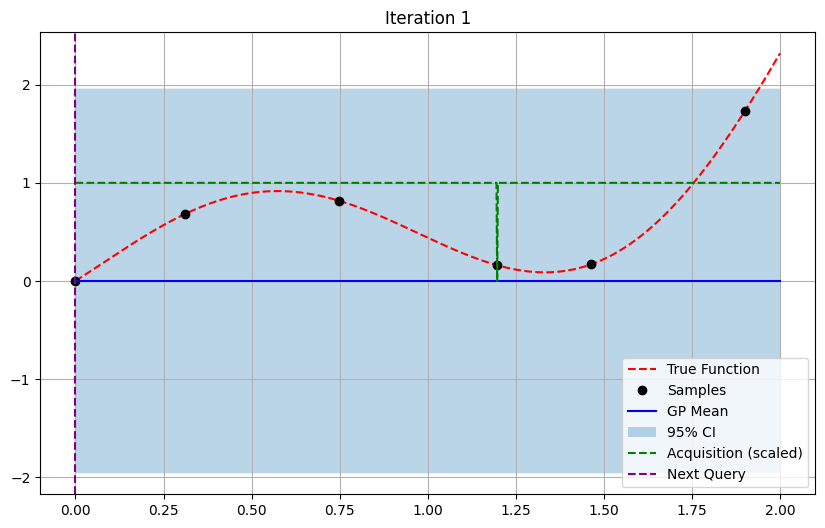

c:\Users\manis\anaconda3\envs\new_torch\Lib\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


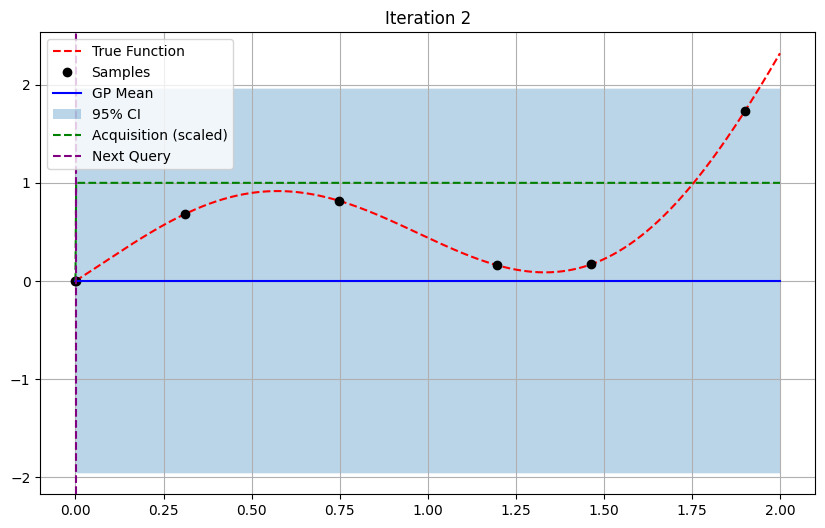

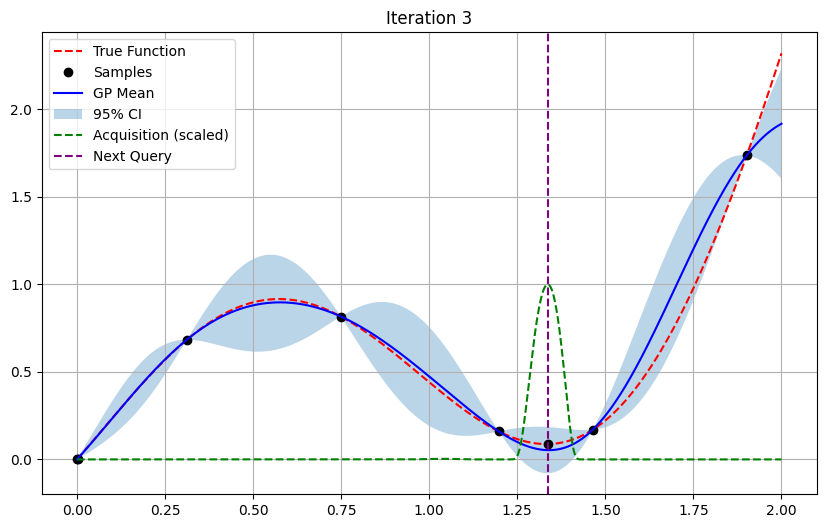

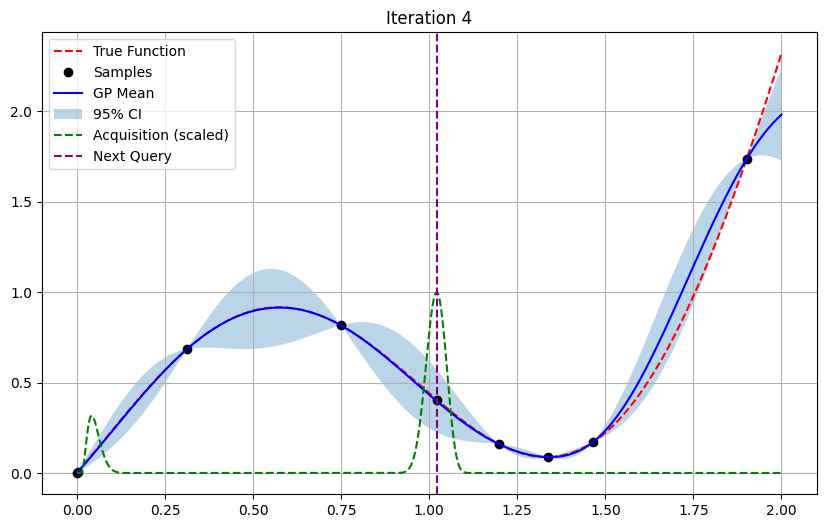

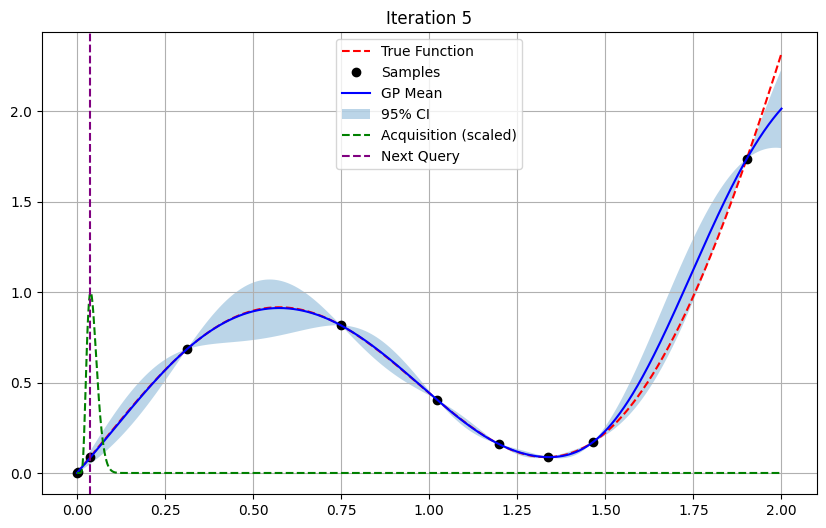

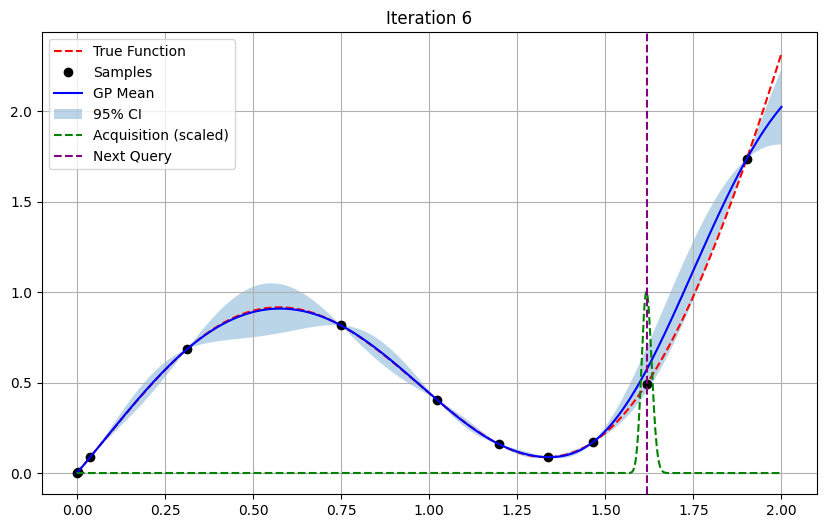

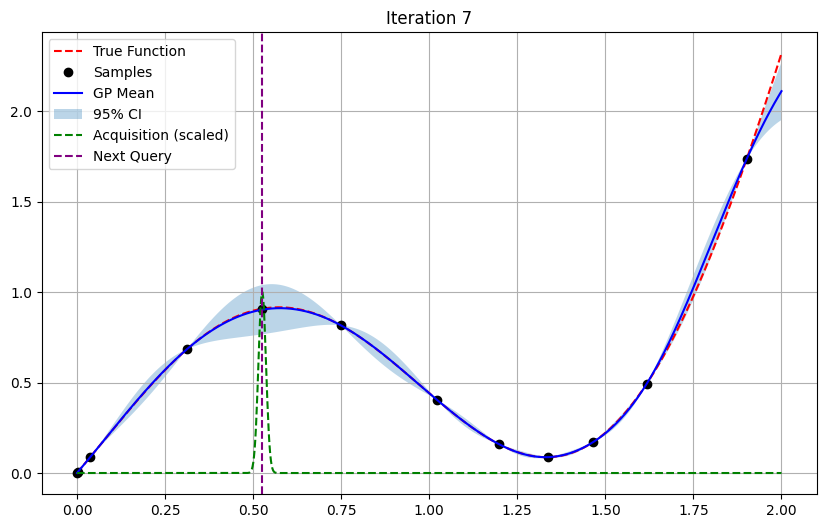

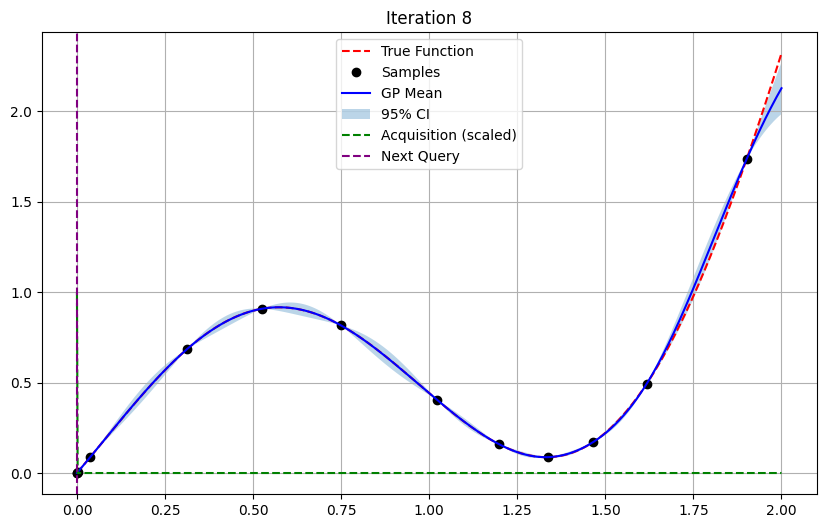

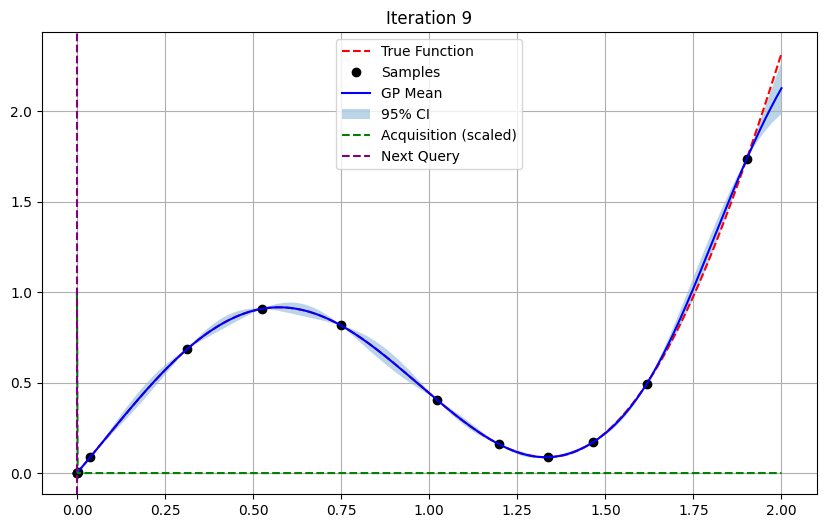

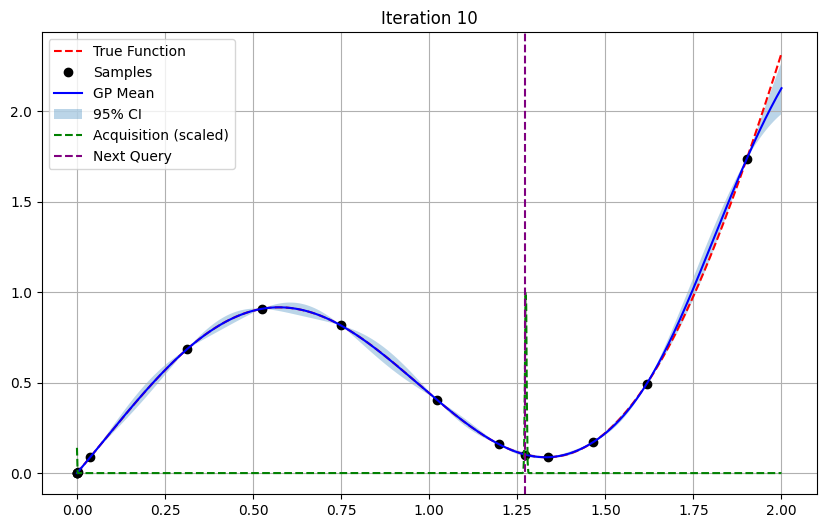


Best found value: x = [0.], f(x) = 0.0000


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern

# 1. Define the black-box function (to minimize)
def f(x):
    """The true function (you can change this)."""
    return np.sin(3 * x) + x**2 - 0.7 * x

# 2. Acquisition function: Probability of Improvement (PI)
def probability_of_improvement(X, X_sample, Y_sample, gp, xi=0.01):
    mu, sigma = gp.predict(X, return_std=True)
    f_min = np.min(Y_sample)

    with np.errstate(divide='warn'):
        Z = (f_min - mu - xi) / sigma
        pi = norm.cdf(Z)
    return pi

# 3. Propose next location to sample
def propose_location(acquisition, X_sample, Y_sample, gp, X_grid):
    scores = acquisition(X_grid, X_sample, Y_sample, gp)
    return X_grid[np.argmax(scores)]

# 4. Plotting helper
def plot_bo(gp, X, Y, X_grid, acquisition=None, X_next=None, title="Bayesian Optimization"):
    mu, sigma = gp.predict(X_grid, return_std=True)
    plt.figure(figsize=(10, 6))
    plt.plot(X_grid, f(X_grid), 'r--', label="True Function")
    plt.plot(X_sample, Y_sample, 'ko', label="Samples")
    plt.plot(X_grid, mu, 'b-', label="GP Mean")
    plt.fill_between(X_grid.ravel(), 
                     mu - 1.96 * sigma, 
                     mu + 1.96 * sigma, 
                     alpha=0.3, label="95% CI")

    if acquisition:
        acq_vals = acquisition(X_grid, X_sample, Y_sample, gp)
        acq_scaled = (acq_vals - np.min(acq_vals)) / (np.max(acq_vals) - np.min(acq_vals))
        plt.plot(X_grid, acq_scaled, 'g--', label="Acquisition (scaled)")

    if X_next is not None:
        plt.axvline(X_next, color='purple', linestyle='--', label="Next Query")

    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# 5. Initialization
np.random.seed(42)
bounds = np.array([[0, 2]])
X_grid = np.linspace(bounds[0, 0], bounds[0, 1], 1000).reshape(-1, 1)

# Initial samples
X_sample = np.random.uniform(bounds[0, 0], bounds[0, 1], size=(5, 1))
Y_sample = f(X_sample)

# Gaussian Process model
kernel = Matern(nu=2.5)
gp = GaussianProcessRegressor(kernel=kernel, alpha=1e-6)

# 6. Bayesian Optimization Loop
n_iter = 10

for i in range(n_iter):
    # Fit GP to current data
    gp.fit(X_sample, Y_sample)

    # Propose next sampling point
    X_next = propose_location(probability_of_improvement, X_sample, Y_sample, gp, X_grid)

    # Evaluate true function at new point
    Y_next = f(X_next)

    # Add to dataset
    X_sample = np.vstack((X_sample, X_next.reshape(1, -1)))
    Y_sample = np.vstack((Y_sample, Y_next.reshape(1, -1)))

    # Plot progress
    plot_bo(gp, X_sample, Y_sample, X_grid, acquisition=probability_of_improvement, X_next=X_next, 
            title=f"Iteration {i+1}")

print(f"\nBest found value: x = {X_sample[np.argmin(Y_sample)]}, f(x) = {np.min(Y_sample):.4f}")


In [1]:
import numpy as np

def sample_exponential(lam, size=1):
    u = np.random.uniform(0, 1, size)
    return -np.log(u) / lam

# Example usage
samples = sample_exponential(lam=2.0, size=5)
print(samples)


[0.09274897 0.51087878 0.03198617 0.31120945 0.20991121]


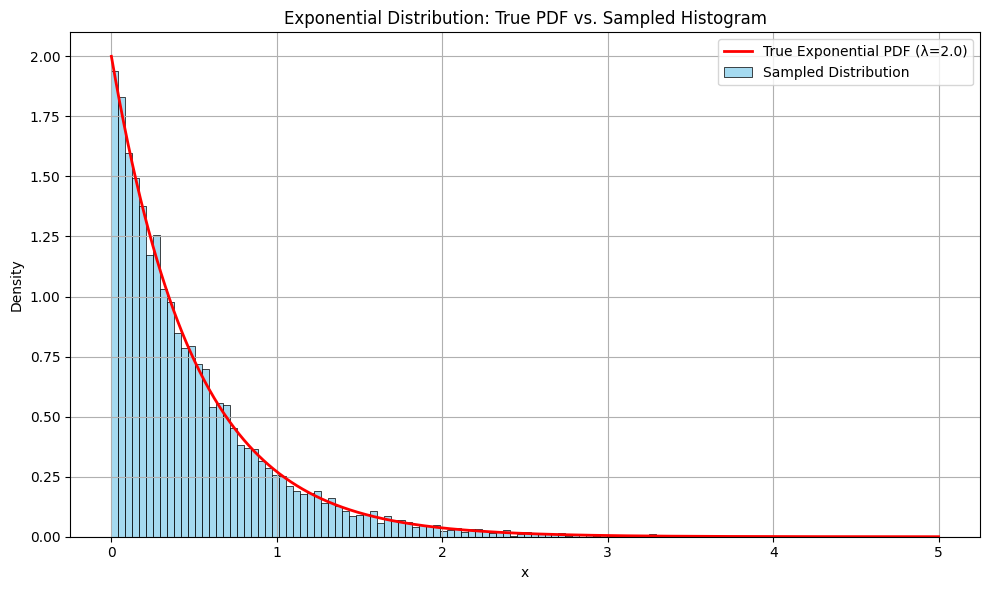

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import expon

# Parameters
lam = 2.0
size = 10000

# Generate samples using inverse transform sampling
u = np.random.uniform(0, 1, size)
samples = -np.log(u) / lam

# Define the range for plotting the true PDF
x = np.linspace(0, 5, 1000)
true_pdf = lam * np.exp(-lam * x)

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(samples, bins=100, stat='density', color='skyblue', label='Sampled Distribution', kde=False)
plt.plot(x, true_pdf, 'r-', lw=2, label='True Exponential PDF (λ=2.0)')
plt.title('Exponential Distribution: True PDF vs. Sampled Histogram')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


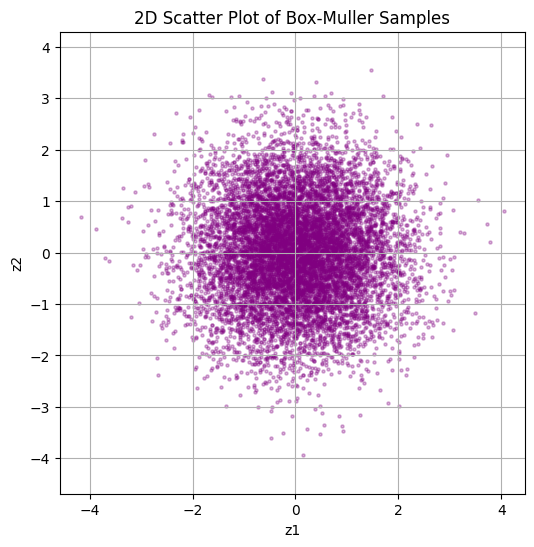

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generate uniform samples
n_samples = 10000
x1 = np.random.uniform(0, 1, n_samples)
x2 = np.random.uniform(0, 1, n_samples)

# Apply Box-Muller transform
z1 = np.sqrt(-2 * np.log(x1)) * np.cos(2 * np.pi * x2)
z2 = np.sqrt(-2 * np.log(x1)) * np.sin(2 * np.pi * x2)

# 2D scatter plot of (z1, z2)
plt.figure(figsize=(6, 6))
plt.scatter(z1, z2, alpha=0.3, s=5, color='purple')
plt.title("2D Scatter Plot of Box-Muller Samples")
plt.xlabel("z1")
plt.ylabel("z2")
plt.axis('equal')
plt.grid(True)
plt.show()


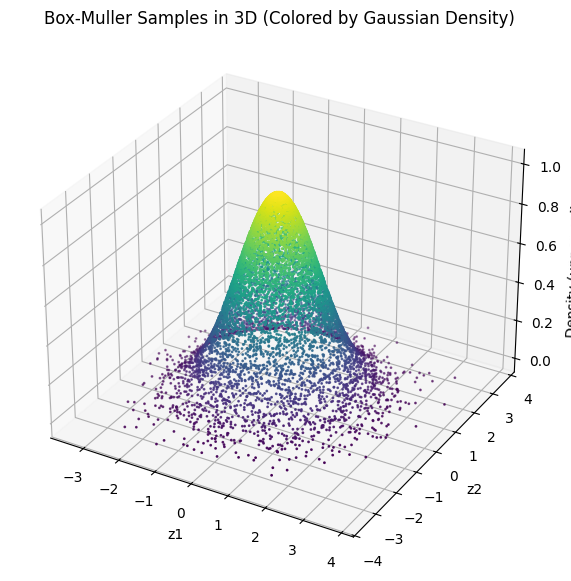

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate uniform random samples
n_samples = 10000
x1 = np.random.uniform(0, 1, n_samples)
x2 = np.random.uniform(0, 1, n_samples)

# Apply Box-Muller transform
z1 = np.sqrt(-2 * np.log(x1)) * np.cos(2 * np.pi *x2)
z2 = np.sqrt(-2 * np.log(x1)) * np.sin(2 * np.pi *x2)

# Compute the norm (for Z-axis)
z = np.exp(-(z1**2 + z2**2) / 2)  # Gaussian density (up to constant factor)

# Plot in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(z1, z2, z, c=z, cmap='viridis', s=1)
ax.set_title("Box-Muller Samples in 3D (Colored by Gaussian Density)")
ax.set_xlabel("z1")
ax.set_ylabel("z2")
ax.set_zlabel("Density (unnormalized)")
plt.show()


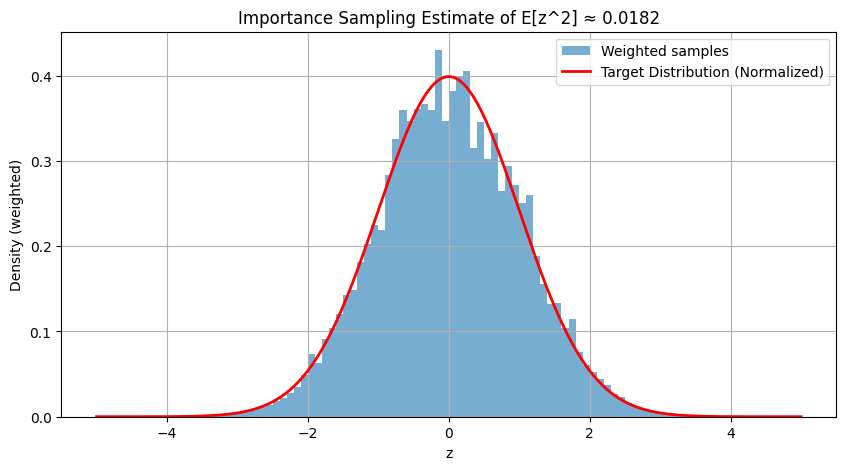

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Target distribution: standard normal (up to normalization)
def p(z):
    return np.exp(-0.5 * z**2)

# Proposal distribution: Uniform(-5, 5)
def q(z):
    return np.where(np.abs(z) <= 5, 1/10, 0)  # Uniform PDF

# Function to estimate expectation of under target distribution
def f(z):
    return z  # Let's say we want to compute E[z^2]

# Number of samples
L = 10000

# Sample from proposal distribution
z_samples = np.random.uniform(-5, 5, L)

# Importance weights
weights = p(z_samples) / q(z_samples)

# Estimate expectation using importance sampling
expectation = np.sum(f(z_samples) * weights) / np.sum(weights)

# Plot the results
plt.figure(figsize=(10, 5))
plt.hist(z_samples, weights=weights, bins=100, density=True, alpha=0.6, label='Weighted samples')
x = np.linspace(-5, 5, 500)
plt.plot(x, p(x)/np.trapz(p(x), x), 'r-', lw=2, label='Target Distribution (Normalized)')
plt.title(f"Importance Sampling Estimate of E[z^2] ≈ {expectation:.4f}")
plt.xlabel("z")
plt.ylabel("Density (weighted)")
plt.legend()
plt.grid(True)
plt.show()


Importance Sampling Estimate of E_p[z^2]: 9.08781945150581


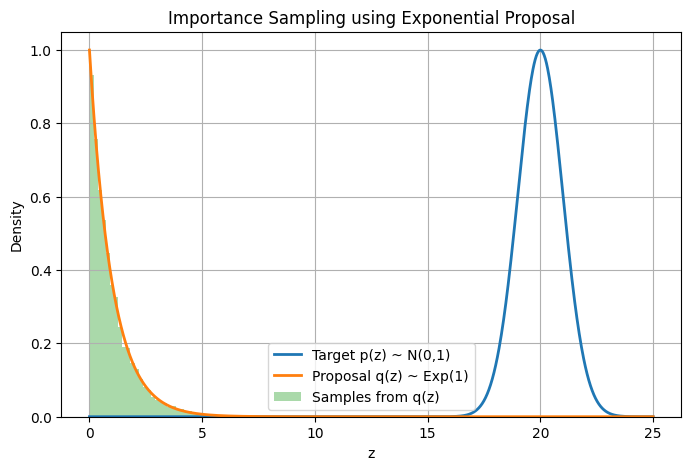

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon

# Function we want to compute expectation of
def f(z):
    return z**1  # For example, E_p[z^2] = Var(N(0,1)) = 1

# Target distribution: Standard Normal
def p(z):
    return np.exp(-0.5 * (z-20)**2)

# Proposal distribution: Exponential (only positive support)
q = lambda z: expon.pdf(z)

# Generate samples from q(z)
L = 10000
z_samples = np.random.exponential(scale=1.0, size=L)

# Compute weights
weights = p(z_samples) / q(z_samples)

# Estimate the expectation
f_vals = f(z_samples)
estimate = np.sum(f_vals * weights) / np.sum(weights)

print("Importance Sampling Estimate of E_p[z^2]:", estimate)

# Plot
plt.figure(figsize=(8,5))
z = np.linspace(0, 25, 1000)
plt.plot(z, p(z), label='Target p(z) ~ N(0,1)', lw=2)
plt.plot(z, q(z), label='Proposal q(z) ~ Exp(1)', lw=2)
plt.hist(z_samples, bins=50, density=True, alpha=0.4, label='Samples from q(z)')
plt.legend()
plt.title("Importance Sampling using Exponential Proposal")
plt.xlabel("z")
plt.ylabel("Density")
plt.grid(True)
plt.show()


Accepted: 0.12495638382260654
Accepted: -0.22493948499842448
Rejected: -0.22493948499842448
Rejected: -0.22493948499842448
Accepted: 0.699071317001392
Accepted: 1.01254016443474
Accepted: 0.3129130171754365
Accepted: 0.995298672654453
Accepted: 1.0371344550421608
Rejected: 1.0371344550421608
Accepted: 1.235597552702521
Rejected: 1.235597552702521
Rejected: 1.235597552702521
Accepted: 0.5246343338316977
Rejected: 0.5246343338316977
Rejected: 0.5246343338316977
Rejected: 0.5246343338316977
Rejected: 0.5246343338316977
Rejected: 0.5246343338316977
Accepted: 0.45932486362937913
Rejected: 0.45932486362937913
Accepted: 0.416524209628019
Accepted: 0.053520976286446253
Rejected: 0.053520976286446253
Accepted: 0.5428616012204108
Accepted: -0.3207678691114667
Rejected: -0.3207678691114667
Accepted: -0.3248936030028968
Rejected: -0.3248936030028968
Accepted: -1.463950740753553
Rejected: -1.463950740753553
Rejected: -1.463950740753553
Rejected: -1.463950740753553
Rejected: -1.463950740753553
Accep

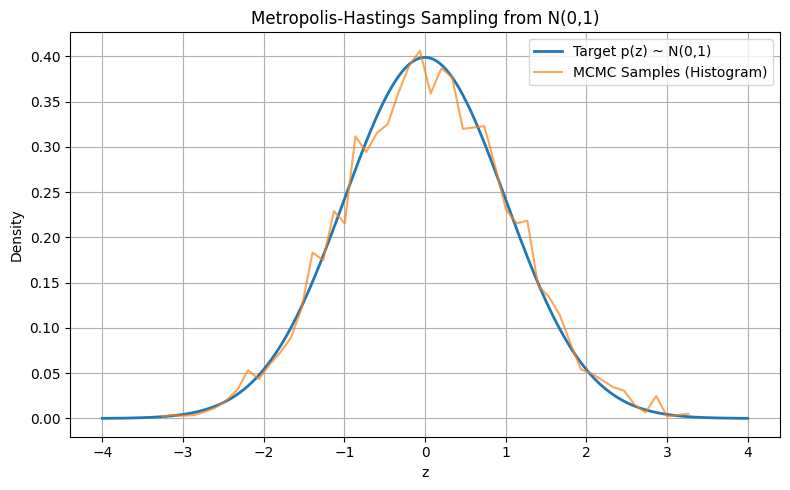

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Target distribution: standard normal (up to a constant)
def target_p(z):
    return np.exp(-0.5 * z**2)  # unnormalized standard normal

# Proposal distribution: normal centered at current sample
def proposal_q(z_current, sigma=1.0):
    return np.random.normal(z_current, sigma)

# Metropolis-Hastings algorithm
def metropolis_hastings(p, q_sampler, initial_z, num_samples, proposal_std=1.0):
    samples = [initial_z]
    z_current = initial_z

    for _ in range(num_samples - 1):
        z_proposal = q_sampler(z_current, proposal_std)
        accept_ratio = min(1, p(z_proposal) / p(z_current))
        if np.random.rand() < accept_ratio:
            z_current = z_proposal
            print("Accepted:", z_current)
        else:
            print("Rejected:", z_current)
        samples.append(z_current)

    return np.array(samples)

# Run MCMC
initial_z = 0.0
num_samples = 10000
samples = metropolis_hastings(target_p, proposal_q, initial_z, num_samples)

# Plot results
x = np.linspace(-4, 4, 1000)
true_pdf = norm.pdf(x)
hist, bins = np.histogram(samples, bins=50, density=True)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

plt.figure(figsize=(8, 5))
plt.plot(x, true_pdf, label='Target p(z) ~ N(0,1)', lw=2)
plt.plot(bin_centers, hist, label='MCMC Samples (Histogram)', alpha=0.7)
plt.title('Metropolis-Hastings Sampling from N(0,1)')
plt.xlabel('z')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


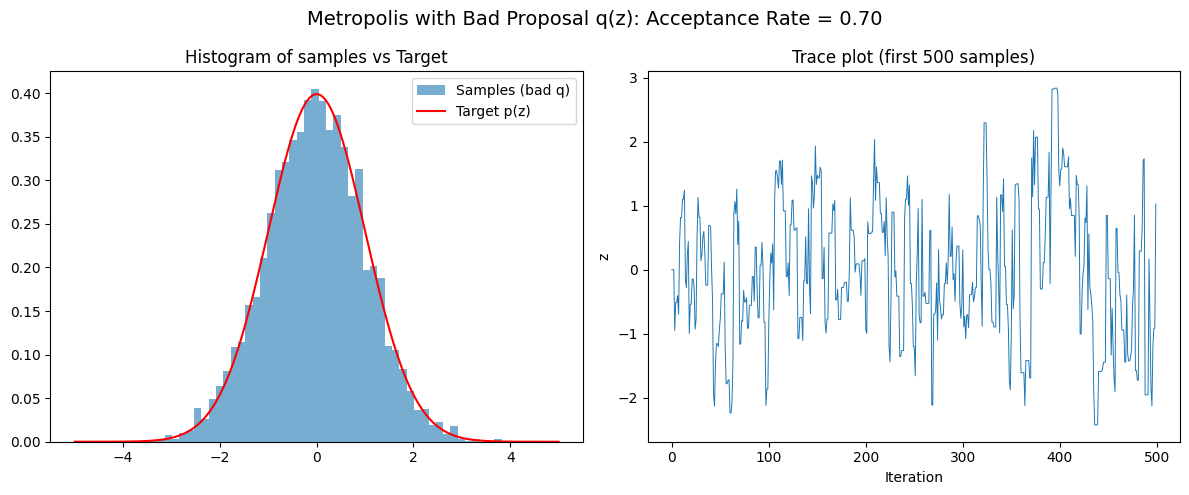

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Target distribution: Standard normal
def p_z(z):
    return np.exp(-0.5 * z**2) / np.sqrt(2 * np.pi)

# Bad proposal distribution: Normal with large variance
def q_bad(z_current):
    return np.random.normal(z_current, 1.0)  # Very large steps

# Metropolis-Hastings algorithm with bad proposal
def metropolis_bad(num_samples=10000):
    samples = [0.0]
    accepted = 0
    for _ in range(num_samples - 1):
        z_current = samples[-1]
        z_proposal = q_bad(z_current)

        # Acceptance ratio
        p_current = p_z(z_current)
        p_proposal = p_z(z_proposal)
        alpha = min(1, p_proposal / p_current)

        if np.random.rand() < alpha:
            samples.append(z_proposal)
            accepted += 1
        else:
            samples.append(z_current)
    acceptance_rate = accepted / num_samples
    return np.array(samples), acceptance_rate

# Run the sampler
samples_bad, acc_rate_bad = metropolis_bad()

# Plot results
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Histogram of samples vs true distribution
x = np.linspace(-5, 5, 1000)
axs[0].hist(samples_bad, bins=50, density=True, alpha=0.6, label="Samples (bad q)")
axs[0].plot(x, p_z(x), label="Target p(z)", color="red")
axs[0].legend()
axs[0].set_title("Histogram of samples vs Target")

# Trace plot
axs[1].plot(samples_bad[:500], lw=0.7)
axs[1].set_title("Trace plot (first 500 samples)")
axs[1].set_xlabel("Iteration")
axs[1].set_ylabel("z")

fig.suptitle(f"Metropolis with Bad Proposal q(z): Acceptance Rate = {acc_rate_bad:.2f}", fontsize=14)
plt.tight_layout()
plt.show()


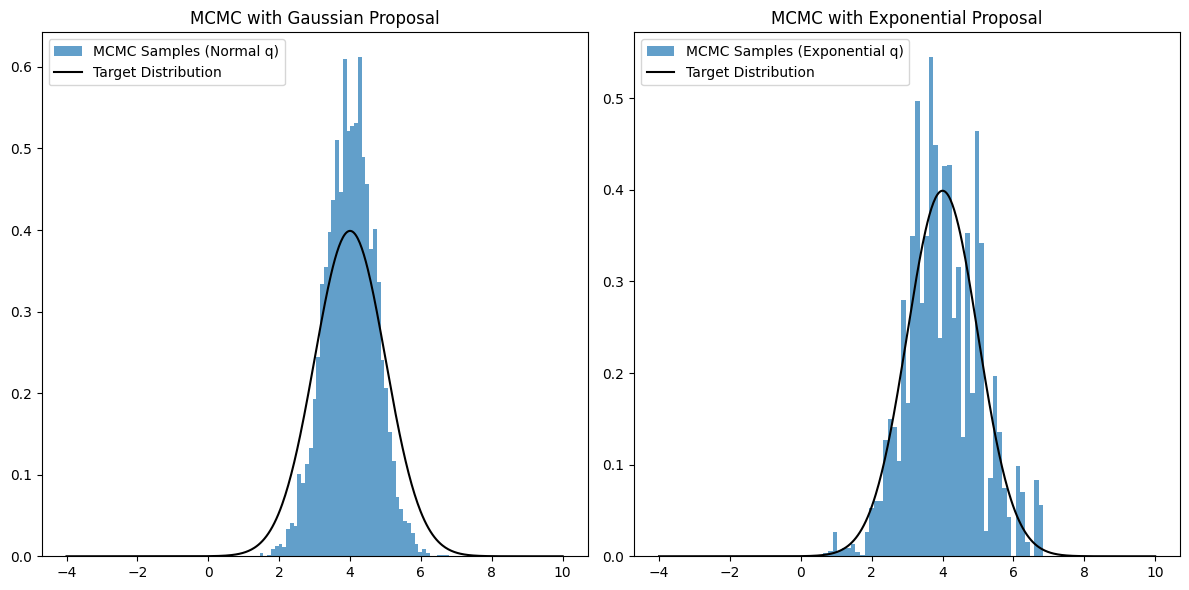

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Target distribution: standard normal (up to proportionality constant)
def p_z(z):
    return np.exp(-0.5 * (z-4)**2)

# Proposal distributions
def q_exp(size):
    return np.random.exponential(scale=1.0, size=size)

def q_normal(size):
    return np.random.normal(loc=4.0, scale=1.0, size=size)

# MCMC with Metropolis-Hastings
def metropolis_hastings(p, q_sampler, q_pdf, initial_z, num_samples):
    samples = []
    z = initial_z
    for _ in range(num_samples):
        z_star = q_sampler(1)[0]
        accept_ratio = min(1, (p(z_star) * q_pdf(z, z_star)) / (p(z) * q_pdf(z_star, z)))
        if np.random.rand() < accept_ratio:
            z = z_star
        samples.append(z)
    return np.array(samples)

# Proposal PDFs (symmetric Gaussian, asymmetric Exponential)
def q_pdf_normal(z_new, z_old):
    return 1.0  # symmetric proposal => cancels in ratio

def q_pdf_exp(z_new, z_old):
    return (1.0 * np.exp(-z_new)) if z_new >= 0 else 0.0  # exponential, support on [0, ∞)

# Run MCMC with Gaussian proposal
samples_normal = metropolis_hastings(p_z, q_normal, q_pdf_normal, initial_z=0.0, num_samples=5000)

# Run MCMC with Exponential proposal
samples_exp = metropolis_hastings(p_z, q_exp, q_pdf_exp, initial_z=0.0, num_samples=5000)

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(samples_normal, bins=50, density=True, alpha=0.7, label='MCMC Samples (Normal q)')
x = np.linspace(-4, 10, 500)
plt.plot(x, p_z(x)/np.trapz(p_z(x), x), label='Target Distribution', color='black')
plt.title('MCMC with Gaussian Proposal')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(samples_exp, bins=50, density=True, alpha=0.7, label='MCMC Samples (Exponential q)')
plt.plot(x, p_z(x)/np.trapz(p_z(x), x), label='Target Distribution', color='black')
plt.title('MCMC with Exponential Proposal')
plt.legend()

plt.tight_layout()
plt.show()


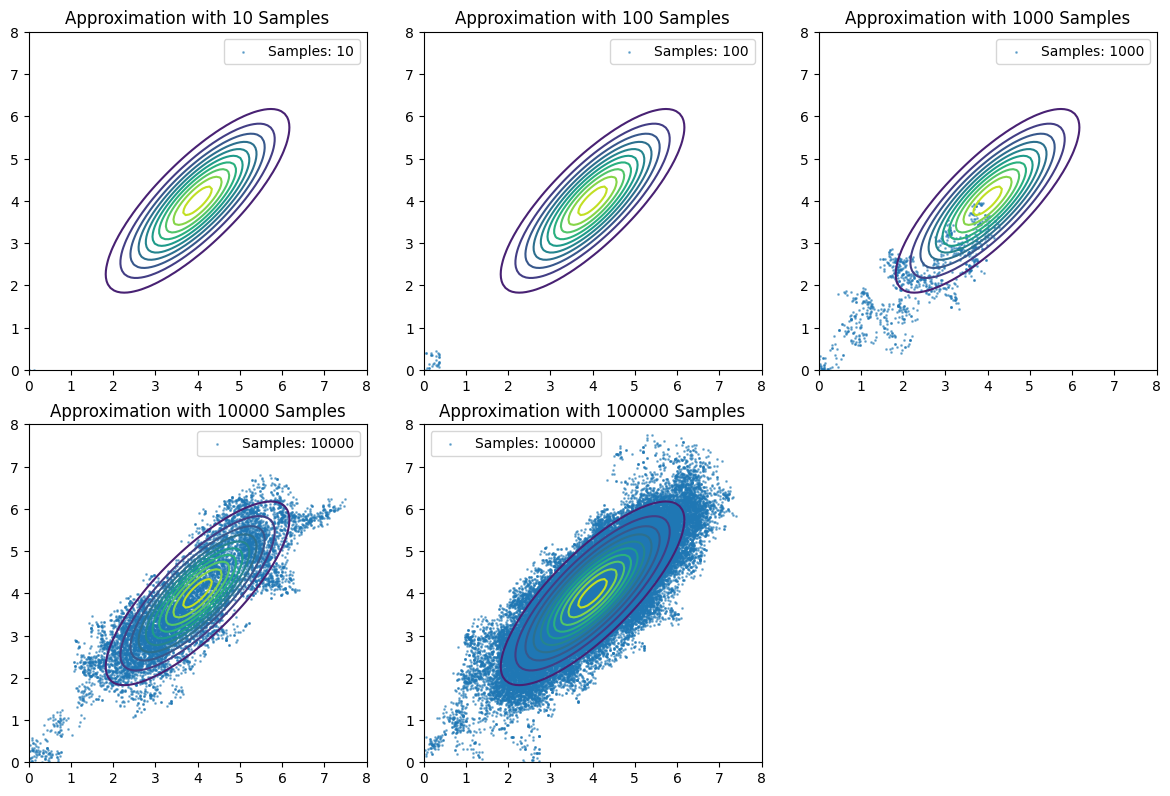

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Target distribution p(z) = N([4, 4], [[1, 0.8], [0.8, 1]])
mu_target = np.array([4, 4])
cov_target = np.array([[1, 0.8], [0.8, 1]])
target_dist = multivariate_normal(mean=mu_target, cov=cov_target)

# Proposal distribution q(z(t) | z(t-1)) = N(z(t-1), [[0.01, 0], [0, 0.01]])
proposal_cov = np.array([[0.01, 0], [0, 0.01]])

def metropolis_hastings(target_dist, proposal_cov, num_samples, initial_state):
    samples = np.zeros((num_samples, 2))
    samples[0] = initial_state
    current_state = initial_state
    
    for t in range(1, num_samples):
        # Propose a new sample from the proposal distribution
        proposed_state = np.random.multivariate_normal(current_state, proposal_cov)
        
        # Compute the acceptance ratio
        acceptance_ratio = target_dist.pdf(proposed_state) / target_dist.pdf(current_state)
        
        # Accept or reject the proposed state
        if np.random.rand() < acceptance_ratio:
            current_state = proposed_state
        
        samples[t] = current_state
    
    return samples

# Plotting function for different sample sizes
def plot_approximation(num_samples_list, initial_state):
    plt.figure(figsize=(12, 8))
    
    for num_samples in num_samples_list:
        samples = metropolis_hastings(target_dist, proposal_cov, num_samples, initial_state)
        
        plt.subplot(2, 3, num_samples_list.index(num_samples)+1)
        plt.scatter(samples[:, 0], samples[:, 1], s=1, alpha=0.5, label=f'Samples: {num_samples}')
        # Plot the true Gaussian distribution
        x, y = np.meshgrid(np.linspace(0, 8, 100), np.linspace(0, 8, 100))
        pos = np.dstack((x, y))
        plt.contour(x, y, target_dist.pdf(pos), levels=10, cmap="viridis")
        plt.title(f'Approximation with {num_samples} Samples')
        plt.xlim([0, 8])
        plt.ylim([0, 8])
        plt.gca().set_aspect('equal', adjustable='box')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Initial state
initial_state = np.array([0, 0])

# List of sample sizes
num_samples_list = [10, 100, 1000, 10000, 100000]

# Plot the approximations
plot_approximation(num_samples_list, initial_state)


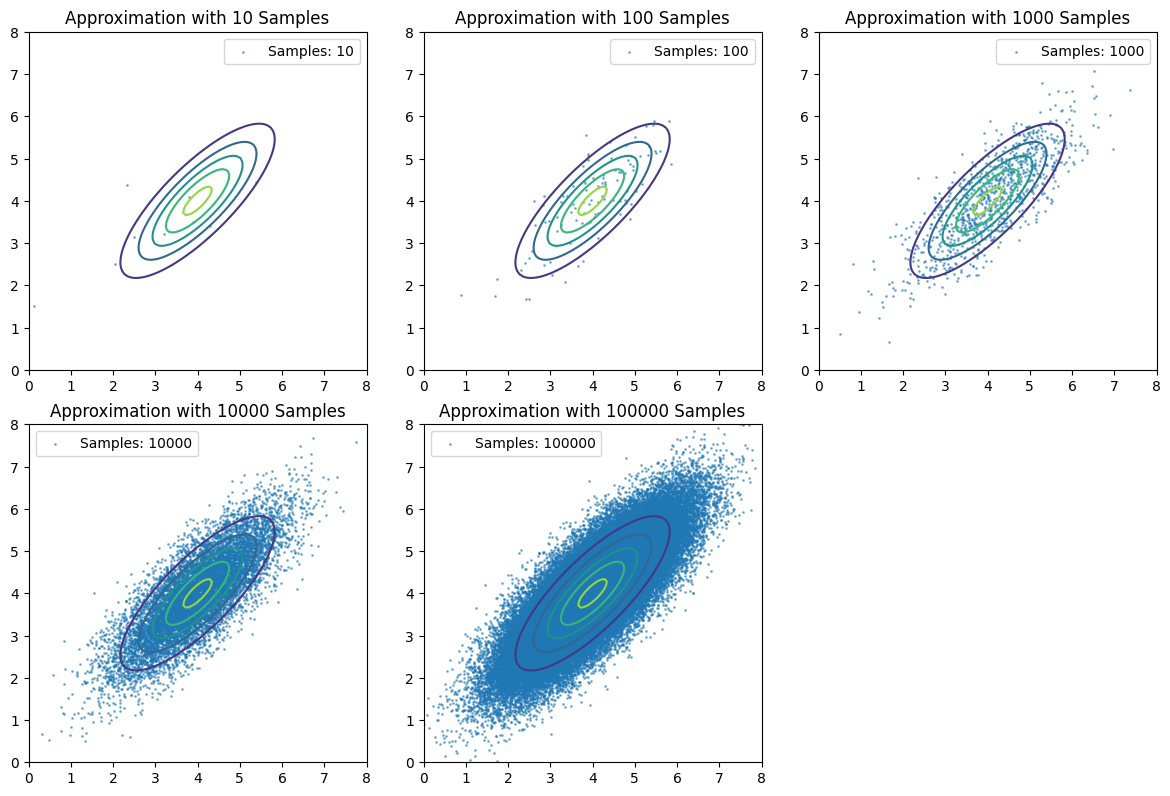

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Target distribution p(z) = N([4, 4], [[1, 0.8], [0.8, 1]])
mu_target = np.array([4, 4])
cov_target = np.array([[1, 0.8], [0.8, 1]])
target_dist = multivariate_normal(mean=mu_target, cov=cov_target)

# Gibbs Sampling for 2D Normal Distribution
def gibbs_sampling(target_dist, num_samples, initial_state):
    samples = np.zeros((num_samples, 2))
    samples[0] = initial_state
    current_state = initial_state
    
    for t in range(1, num_samples):
        # Sample z1 | z2 from the conditional distribution p(z1 | z2)
        mean_z1 = mu_target[0] + cov_target[0, 1] / cov_target[1, 1] * (current_state[1] - mu_target[1])
        var_z1 = cov_target[0, 0] - cov_target[0, 1]**2 / cov_target[1, 1]
        z1 = np.random.normal(mean_z1, np.sqrt(var_z1))
        
        # Sample z2 | z1 from the conditional distribution p(z2 | z1)
        mean_z2 = mu_target[1] + cov_target[1, 0] / cov_target[0, 0] * (z1 - mu_target[0])
        var_z2 = cov_target[1, 1] - cov_target[1, 0]**2 / cov_target[0, 0]
        z2 = np.random.normal(mean_z2, np.sqrt(var_z2))
        
        current_state = np.array([z1, z2])
        samples[t] = current_state
    
    return samples

# Plotting function for different sample sizes
def plot_gibbs_approximation(num_samples_list, initial_state):
    plt.figure(figsize=(12, 8))
    
    for num_samples in num_samples_list:
        samples = gibbs_sampling(target_dist, num_samples, initial_state)
        
        plt.subplot(2, 3, num_samples_list.index(num_samples)+1)
        plt.scatter(samples[:, 0], samples[:, 1], s=1, alpha=0.5, label=f'Samples: {num_samples}')
        plt.title(f'Approximation with {num_samples} Samples')
        x, y = np.meshgrid(np.linspace(0, 8, 100), np.linspace(0, 8, 100))
        pos = np.dstack((x, y))
        plt.contour(x, y, target_dist.pdf(pos), levels=5, cmap="viridis")
        plt.xlim([0, 8])
        plt.ylim([0, 8])
        plt.gca().set_aspect('equal', adjustable='box')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Initial state
initial_state = np.array([0, 0])

# List of sample sizes
num_samples_list = [10, 100, 1000, 10000, 100000]

# Plot the approximations
plot_gibbs_approximation(num_samples_list, initial_state)


In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from autograd import grad

# Define the log-posterior function (unnormalized) p(theta) = Likelihood * Prior
# For this example, assume a Gaussian likelihood and a Gaussian prior

def log_likelihood(theta):
    # Assuming a Gaussian likelihood with mean=4, covariance=1
    mean = 4
    cov = 1
    return -0.5 * np.sum((theta - mean)**2 / cov)  # Simplified Gaussian likelihood

def log_prior(theta):
    # Assuming a Gaussian prior with mean=0, covariance=1
    return -0.5 * np.sum(theta**2)

def log_posterior(theta):
    # Unnormalized log-posterior = log-likelihood + log-prior
    return log_likelihood(theta) + log_prior(theta)

# Gradient of the log-posterior (we use autograd for automatic differentiation)
grad_log_posterior = grad(log_posterior)

# Langevin dynamics proposal (with noise)
def langevin_step(theta, eta_t):
    grad_log_p = grad_log_posterior(theta)
    noise = np.random.normal(0, np.sqrt(eta_t), size=theta.shape)
    proposal = theta + 0.5 * eta_t * grad_log_p + noise
    return proposal

# Metropolis-Hastings acceptance criterion
def metropolis_acceptance(theta, proposal):
    current_log_p = log_posterior(theta)
    proposal_log_p = log_posterior(proposal)
    acceptance_prob = min(1, np.exp(proposal_log_p - current_log_p))
    return np.random.rand() < acceptance_prob

# MCMC Sampling using Langevin dynamics
def mcmc_langevin(num_samples, initial_state, eta_t):
    samples = np.zeros((num_samples, len(initial_state)))
    samples[0] = initial_state
    current_state = initial_state

    for t in range(1, num_samples):
        # Propose a new state using Langevin dynamics
        proposal = langevin_step(current_state, eta_t)

        # Accept or reject the proposal
        if metropolis_acceptance(current_state, proposal):
            current_state = proposal
        
        samples[t] = current_state

    return samples

# Set initial state and hyperparameters
initial_state = np.array([0.0])
eta_t = 0.1  # Step size (tuning parameter)
num_samples = 10000

# Run MCMC with Langevin dynamics
samples = mcmc_langevin(num_samples, initial_state, eta_t)

# Plot the MCMC samples
plt.plot(samples[:, 0], label='Sampled $\theta$')
plt.xlabel('Iteration')
plt.ylabel('$\\theta$')
plt.title('MCMC Sampling with Langevin Dynamics')
plt.show()


TypeError: grad_np_sum() got an unexpected keyword argument 'out'

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from autograd import grad, hessian

# Define the log-posterior function (unnormalized) p(theta) = Likelihood * Prior
# For this example, assume a Gaussian likelihood and a Gaussian prior

def log_likelihood(theta):
    mean = 4
    cov = 1
    return -0.5 * np.sum((theta - mean)**2 / cov)  # Simplified Gaussian likelihood

def log_prior(theta):
    return -0.5 * np.sum(theta**2)  # Gaussian prior

def log_posterior(theta):
    return log_likelihood(theta) + log_prior(theta)

# Gradient and Hessian of the log-posterior
grad_log_posterior = grad(log_posterior)
hess_log_posterior = hessian(log_posterior)

# Langevin dynamics proposal with preconditioner (SMMALA)
def smmala_step(theta, eta_t):
    grad_log_p = grad_log_posterior(theta)
    hess_log_p = hess_log_posterior(theta)  # Second derivative (Hessian)
    preconditioner = np.linalg.inv(hess_log_p) if np.linalg.det(hess_log_p) != 0 else np.eye(len(theta))  # Inverse Hessian (if invertible)
    noise = np.random.normal(0, np.sqrt(eta_t), size=theta.shape)
    
    # Proposal using preconditioned gradient
    proposal = theta + 0.5 * eta_t * np.dot(preconditioner, grad_log_p) + noise
    return proposal

# Metropolis-Hastings acceptance criterion
def metropolis_acceptance(theta, proposal):
    current_log_p = log_posterior(theta)
    proposal_log_p = log_posterior(proposal)
    acceptance_prob = min(1, np.exp(proposal_log_p - current_log_p))
    return np.random.rand() < acceptance_prob

# MCMC Sampling using Simplified Manifold MALA
def mcmc_smmala(num_samples, initial_state, eta_t):
    samples = np.zeros((num_samples, len(initial_state)))
    samples[0] = initial_state
    current_state = initial_state

    for t in range(1, num_samples):
        # Propose a new state using SMMALA
        proposal = smmala_step(current_state, eta_t)

        # Accept or reject the proposal
        if metropolis_acceptance(current_state, proposal):
            current_state = proposal
        
        samples[t] = current_state

    return samples

# Set initial state and hyperparameters
initial_state = np.array([0.0])
eta_t = 0.1  # Step size (tuning parameter)
num_samples = 10000

# Run MCMC with Simplified Manifold MALA
samples = mcmc_smmala(num_samples, initial_state, eta_t)

# Plot the MCMC samples
plt.plot(samples[:, 0], label='Sampled $\theta$')
plt.xlabel('Iteration')
plt.ylabel('$\\theta$')
plt.title('MCMC Sampling with Simplified Manifold MALA')
plt.show()


TypeError: grad_np_sum() got an unexpected keyword argument 'out'

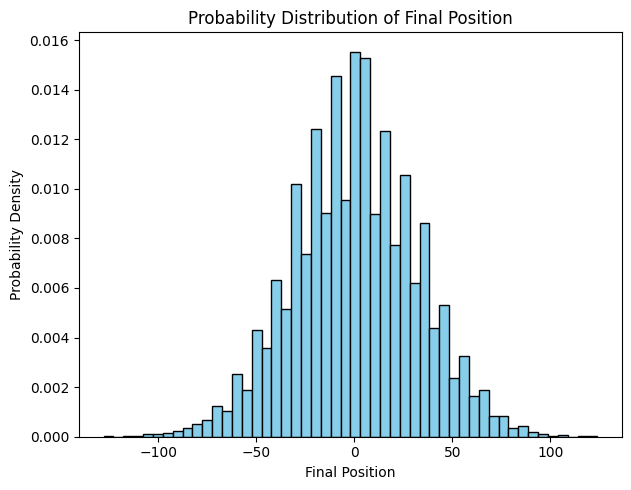

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_steps = 1000# steps per walk
num_walks = 10000    # number of random walks
p_right = 0.5       # probability of stepping to the right
p_left = 1 - p_right

# Simulate random walks
final_positions = []
for _ in range(num_walks):
    steps = np.random.choice([-1, 1], size=num_steps, p=[p_left, p_right])
    position = np.sum(steps)
    final_positions.append(position)

# Plotting
plt.figure(figsize=(12, 5))

# Histogram of final positions
plt.subplot(1, 2, 1)
plt.hist(final_positions, bins=50, density=True, color='skyblue', edgecolor='k')
plt.title("Probability Distribution of Final Position")
plt.xlabel("Final Position")
plt.ylabel("Probability Density")

# Example single random walk
# plt.subplot(1, 2, 2)
# example_steps = np.random.choice([-1, 1], size=num_steps, p=[p_left, p_right])
# example_walk = np.cumsum(example_steps)
# plt.plot(range(num_steps), example_walk, color='orange')
# plt.title("Example 1D Random Walk")
# plt.xlabel("Step")
# plt.ylabel("Position")

plt.tight_layout()
plt.show()
